+ Primero importamos las librerías que vamos a necesitar:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


### Avance 1

+ Cargamos el dataset original:

In [2]:
data=pd.read_csv("Documentación/data_latinoamerica.csv",sep=',')

+ Verificamos la cantidad de filas y columnas del dataset cargado:

In [3]:
np.shape(data)

(12216057, 50)

+ Verificamos la cantidad de registros por country_name(nombre de país) y observamos que hay registros de otros países que no están includidos en el estudio. 

In [4]:
data.value_counts('country_name')

country_name
Brazil                5565456
Mexico                2475518
Peru                  1883891
Colombia              1145596
Argentina              540095
Chile                  359733
Dominican Republic      32703
Ecuador                 24775
Venezuela               24775
Guatemala               22793
Uruguay                 19820
Paraguay                18829
Honduras                18829
Cuba                    17838
Nicaragua               17838
El Salvador             14865
Panama                  13874
Bolivia                  9910
Costa Rica               7928
Puerto Rico               991
Name: count, dtype: int64

+ Seleccionamos los registros de los países objetivos del estudio: Colombia, Argentina, Chile, México, Perú y Brasil.

In [5]:
paises_seleccionados=['Colombia','Argentina','Chile','Mexico','Peru','Brazil']
data_latinoamerica=data[data['country_name'].isin(paises_seleccionados)]

#verificamos la cantidad de filas y columnas:
np.shape(data_latinoamerica)

(11970289, 50)

+ Verificamos la cantidad de registros por nombre de país, solo para los paises seleccionados:

In [6]:
data_latinoamerica.value_counts('country_name')

country_name
Brazil       5565456
Mexico       2475518
Peru         1883891
Colombia     1145596
Argentina     540095
Chile         359733
Name: count, dtype: int64

+ Realizamos una verificación de los valores nulos que hay por cada columna y que nos muestre las columnas que tiene más de 4 millones de valores nulos

In [7]:
data_latinoamerica.isnull().sum()[data_latinoamerica.isnull().sum()>4000000]

new_confirmed                             5620283
new_deceased                              5661788
cumulative_confirmed                      5619937
cumulative_deceased                       5661426
cumulative_vaccine_doses_administered    11706131
population_rural                         11964343
population_urban                         11964343
population_density                       11964343
human_development_index                   6472221
gdp_usd                                  11963352
gdp_per_capita_usd                       11962361
smoking_prevalence                       11964343
diabetes_prevalence                      11964343
infant_mortality_rate                    11964343
nurses_per_1000                          11964343
physicians_per_1000                      11964343
population_largest_city                  11964343
area_rural_sq_km                         11964343
area_urban_sq_km                         11964343
life_expectancy                          11964343


In [8]:
data_latinoamerica.location_key.value_counts()

location_key
PE_UCA_0401    991
AR             991
AR_A           991
AR_A_007       991
AR_A_014       991
              ... 
AR_A_140       991
AR_A_147       991
AR_A_154       991
AR_A_161       991
AR_B           991
Name: count, Length: 12079, dtype: int64

+ Hemos identificado que muchos valores son nulos, por ello hemos realizado una máscara para filtrar el dataset con la columna location_key. ya que vamos a utilizar los valores de los países y no de las regiones.


In [9]:
data_latinoamerica_pais=data_latinoamerica[data_latinoamerica['location_key'].isin(['CO','AR','CL','MX','PE','BR'])]
np.shape(data_latinoamerica_pais)

(5946, 50)

+ Ahora vamos a filtrar el dataframe por la fecha (2021-01-01):

In [10]:
data_latinoamerica_pais_fecha=data_latinoamerica_pais[data_latinoamerica_pais['date']>'2021-01-01']
np.shape(data_latinoamerica_pais_fecha)

(3744, 50)

+ Con el nuevo dataframe, vamos a verificar la cantidad de elementos nulos que tenemos:

In [11]:
valores_nulos_fecha=data_latinoamerica_pais_fecha.isnull().sum()[data_latinoamerica_pais_fecha.isnull().sum()>0]

print(valores_nulos_fecha)
print(np.shape(data_latinoamerica_pais_fecha))

new_confirmed                              21
new_deceased                               21
cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
average_temperature_celsius                42
minimum_temperature_celsius                41
maximum_temperature_celsius                41
rainfall_mm                                90
relative_humidity                          42
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64
(3744, 50)


+ Ahora comparamos los datos faltantes a nivel país. En este caso estamos comparando los valores vacíos de la columna new_confirmed y luego vemos un resumen de los totales de datos faltantes por país pero solo de la columna analizada, este análisis se está realizando en una sola columna para ir de lo particular a lo general.

In [12]:
# Verificamos el detalle de los datos  faltantes de la columna 'new_confirmed' por país
print(data_latinoamerica_pais_fecha[data_latinoamerica_pais_fecha['new_confirmed'].isnull()])

         location_key        date country_code country_name  new_confirmed  \
987                AR  2022-09-14           AR    Argentina            NaN   
988                AR  2022-09-15           AR    Argentina            NaN   
989                AR  2022-09-16           AR    Argentina            NaN   
990                AR  2022-09-17           AR    Argentina            NaN   
550994             BR  2022-09-16           BR       Brazil            NaN   
550995             BR  2022-09-17           BR       Brazil            NaN   
6116448            CL  2022-09-14           CL        Chile            NaN   
6116449            CL  2022-09-15           CL        Chile            NaN   
6116450            CL  2022-09-16           CL        Chile            NaN   
6116451            CL  2022-09-17           CL        Chile            NaN   
6476181            CO  2022-09-14           CO     Colombia            NaN   
6476182            CO  2022-09-15           CO     Colombia     

In [13]:
# Procedemos a contabilizar los registros faltantes en la columna 'cumulative_vaccine_doses_administered':
(data_latinoamerica_pais_fecha[data_latinoamerica_pais_fecha['cumulative_vaccine_doses_administered'].isnull()]).groupby('location_key').size() 

location_key
AR      4
BR     17
CL     13
CO    290
MX    217
PE     43
dtype: int64

In [14]:
# Procedemos a contabilizar los registros válidos en la columna 'cumulative_vaccine_doses_administered':
(data_latinoamerica_pais_fecha[data_latinoamerica_pais_fecha['cumulative_vaccine_doses_administered'].notnull()]).groupby('location_key').size()

location_key
AR    620
BR    607
CL    611
CO    334
MX    407
PE    581
dtype: int64

In [15]:
data_latinoamerica_pais_fecha.head()

location_key        date country_code country_name  new_confirmed  \
367           AR  2021-01-02           AR    Argentina         7767.0   
368           AR  2021-01-03           AR    Argentina         4934.0   
369           AR  2021-01-04           AR    Argentina        13953.0   
370           AR  2021-01-05           AR    Argentina        14085.0   
371           AR  2021-01-06           AR    Argentina        14496.0   

     new_deceased  cumulative_confirmed  cumulative_deceased  \
367         166.0             1670634.0              46688.0   
368         157.0             1675568.0              46845.0   
369         157.0             1689521.0              47002.0   
370         160.0             1703606.0              47162.0   
371         131.0             1718102.0              47293.0   

     cumulative_vaccine_doses_administered  population  ...  \
367                                20334.0  44938712.0  ...   
368                                20529.0  44938712.0  ...   
369                                25164.0  44938712.0  ...   
370                                29852.0  44938712.0  ...   
371                                34162.0  44938712.0  ...   

     population_largest_city  area_rural_sq_km  area_urban_sq_km  \
367               15057273.0         2690269.0           55032.0   
368               15057273.0         2690269.0           55032.0   
369               15057273.0         2690269.0           55032.0   
370               15057273.0         2690269.0           55032.0   
371               15057273.0         2690269.0           55032.0   

     life_expectancy  adult_male_mortality_rate  adult_female_mortality_rate  \
367            76.52                    147.086                       79.483   
368            76.52                    147.086                       79.483   
369            76.52                    147.086                       79.483   
370            76.52                    147.086                       79.483   
371            76.52                    147.086                       79.483   

     pollution_mortality_rate  comorbidity_mortality_rate  new_recovered  \
367                      26.6                        15.8            NaN   
368                      26.6                        15.8            NaN   
369                      26.6                        15.8            NaN   
370                      26.6                        15.8            NaN   
371                      26.6                        15.8            NaN   

     cumulative_recovered  
367                   NaN  
368                   NaN  
369                   NaN  
370                   NaN  
371                   NaN  

[5 rows x 50 columns]

+ Ahora comparamos el promedio de 'new_confirmed' general y de Colombia, ya que es un dato importante el cuál nos servira para remplazar datos mas adelante.

In [16]:
# Promedio general de new_confirmed
data_latinoamerica_pais_fecha.new_confirmed.mean()

np.float64(13936.279613215149)

In [17]:
# Promedio de new_confirmed para Colombia
data_latinoamerica_pais_fecha.loc[data_latinoamerica_pais_fecha['country_name']=='Colombia','new_confirmed'].mean()

np.float64(7407.414516129033)

In [18]:
# traemos el nombre de las columnas de los valores nulos y evaluar con que datos reemplzazar dichos valores
valores_nulos_fecha.index

Index(['new_confirmed', 'new_deceased', 'cumulative_confirmed',
       'cumulative_deceased', 'cumulative_vaccine_doses_administered',
       'average_temperature_celsius', 'minimum_temperature_celsius',
       'maximum_temperature_celsius', 'rainfall_mm', 'relative_humidity',
       'new_recovered', 'cumulative_recovered'],
      dtype='object')

    * Tenemos los siguientes columnas con valores nulos y vamos a reemplazar dichos datos según:
+ new_confirmed                              21   (media)
+ new_deceased                               21   (media)
+ cumulative_confirmed                       21   (cero) 
+ cumulative_deceased                        21   (cero) 
+ cumulative_vaccine_doses_administered     584   (cero)  
+ average_temperature_celsius                42   (media)
+ minimum_temperature_celsius                41   (media) 
+ maximum_temperature_celsius                41   (media)
+ rainfall_mm                                90   (media)
+ relative_humidity                          42   (media)
+ new_recovered                            2116   (cero) 
+ cumulative_recovered                     2736   (cero) 

+ Comenzamos a reemplazar las valores nulos por la media, según lo indicado en punto anterior:

In [19]:
paises_seleccionados=['Colombia','Argentina','Chile','Mexico','Peru','Brazil']

#seleccionamos la columna donde cambiaremos los datos nulos porla media:
columnas_por_media=['new_confirmed','new_deceased','average_temperature_celsius','minimum_temperature_celsius','maximum_temperature_celsius','rainfall_mm','relative_humidity']

for pais in paises_seleccionados:
    for columna in columnas_por_media:
        data_latinoamerica_pais_fecha.loc[data_latinoamerica_pais_fecha['country_name']==pais,columna]=data_latinoamerica_pais_fecha[columna].fillna(data_latinoamerica_pais_fecha[data_latinoamerica_pais_fecha['country_name'] == pais][columna].mean())

In [20]:
# Verificamos que solo aparezcan las columnas que faltan reemplazar sus valores:
print(data_latinoamerica_pais_fecha.isnull().sum()[data_latinoamerica_pais_fecha.isnull().sum()>0])

cumulative_confirmed                       21
cumulative_deceased                        21
cumulative_vaccine_doses_administered     584
new_recovered                            2116
cumulative_recovered                     2736
dtype: int64


+ Ahora seguimos reemplzando los valores nulos por ceros:

In [21]:
paises_seleccionados=['Colombia','Argentina','Chile','Mexico','Peru','Brazil']

# Seleccionamos las columnas a reemplazar por cero:
columnas_por_ceros=['cumulative_confirmed','cumulative_deceased','new_recovered','cumulative_recovered','cumulative_vaccine_doses_administered']

for pais in paises_seleccionados:
    for columna in columnas_por_ceros:
        data_latinoamerica_pais_fecha.loc[data_latinoamerica_pais_fecha['country_name']==pais,columna]=data_latinoamerica_pais_fecha[columna].fillna(0)

In [22]:
# Verificamos que no aparezca ninguna columna con valores nulos:
print(data_latinoamerica_pais_fecha.isnull().sum()[data_latinoamerica_pais_fecha.isnull().sum()>0])

Series([], dtype: int64)


+ Realizamos un bucle for para poder ver información de cada columna, mediante la función describe(). En este paso observamos que hay algunos valores negativos, los cuales reemplazaremos por su valor absoluto:

In [23]:
for i in data_latinoamerica_pais_fecha.columns:
    print(i)
    print(data_latinoamerica_pais_fecha[i].describe())
    print('---------------------------------------')

location_key
count     3744
unique       6
top         AR
freq       624
Name: location_key, dtype: object
---------------------------------------
date
count           3744
unique           624
top       2022-09-17
freq               6
Name: date, dtype: object
---------------------------------------
country_code
count     3744
unique       6
top         AR
freq       624
Name: country_code, dtype: object
---------------------------------------
country_name
count          3744
unique            6
top       Argentina
freq            624
Name: country_name, dtype: object
---------------------------------------
new_confirmed
count      3744.000000
mean      13921.908931
std       24219.361378
min        -573.000000
25%        1536.750000
50%        5214.000000
75%       14834.000000
max      298408.000000
Name: new_confirmed, dtype: float64
---------------------------------------
new_deceased
count     3744.000000
mean       276.887411
std        507.240028
min          0.000000
25%      

* Ahora procedemos a cambiar los valores menores  a cero por su absoluto para las columnas 'new_confirmed' y 'new_recovered'

In [24]:
# verificamos el registro de la columna 'new_confirmed' que tiene valores negativos
data_latinoamerica_pais_fecha[data_latinoamerica_pais_fecha['new_confirmed']<0]

location_key        date country_code country_name  new_confirmed  \
550634           BR  2021-09-21           BR       Brazil         -573.0   

        new_deceased  cumulative_confirmed  cumulative_deceased  \
550634         485.0            21247094.0             591440.0   

        cumulative_vaccine_doses_administered   population  ...  \
550634                            221952593.0  212559409.0  ...   

        population_largest_city  area_rural_sq_km  area_urban_sq_km  \
550634               21846507.0         8241430.0          134981.0   

        life_expectancy  adult_male_mortality_rate  \
550634           75.672                    188.528   

        adult_female_mortality_rate  pollution_mortality_rate  \
550634                       91.421                      29.9   

        comorbidity_mortality_rate  new_recovered  cumulative_recovered  
550634                        16.6        19307.0            20250198.0  

[1 rows x 50 columns]

In [39]:
# Cambiamos la columna a su valor absoluto:
data_latinoamerica_pais_fecha['new_confirmed'] = data_latinoamerica_pais_fecha['new_confirmed'].apply(lambda x: abs(x))

# Verificamos que ya no tenga valores negativos:
data_latinoamerica_pais_fecha[data_latinoamerica_pais_fecha['new_confirmed']<0]

C:\Users\VSK_5\AppData\Local\Temp\ipykernel_24252\42328404.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_pais_fecha['new_confirmed'] = data_latinoamerica_pais_fecha['new_confirmed'].apply(lambda x: abs(x))


Empty DataFrame
Columns: [location_key, date, country_code, country_name, new_confirmed, new_deceased, cumulative_confirmed, cumulative_deceased, cumulative_vaccine_doses_administered, population, population_male, population_female, population_rural, population_urban, population_density, human_development_index, population_age_00_09, population_age_10_19, population_age_20_29, population_age_30_39, population_age_40_49, population_age_50_59, population_age_60_69, population_age_70_79, population_age_80_and_older, gdp_usd, gdp_per_capita_usd, latitude, longitude, area_sq_km, smoking_prevalence, diabetes_prevalence, infant_mortality_rate, nurses_per_1000, physicians_per_1000, average_temperature_celsius, minimum_temperature_celsius, maximum_temperature_celsius, rainfall_mm, relative_humidity, population_largest_city, area_rural_sq_km, area_urban_sq_km, life_expectancy, adult_male_mortality_rate, adult_female_mortality_rate, pollution_mortality_rate, comorbidity_mortality_rate, new_recovered, cumulative_recovered]
Index: []

[0 rows x 50 columns]

In [26]:
# verificamos el registro de la columna 'new_recovered' que tiene valores negativos
data_latinoamerica_pais_fecha[data_latinoamerica_pais_fecha['new_recovered']<0].head()

location_key        date country_code country_name  new_confirmed  \
550632           BR  2021-09-19           BR       Brazil         9458.0   
550633           BR  2021-09-20           BR       Brazil         7884.0   
550736           BR  2022-01-01           BR       Brazil         3986.0   
550744           BR  2022-01-09           BR       Brazil        24382.0   
550750           BR  2022-01-15           BR       Brazil        48520.0   

        new_deceased  cumulative_confirmed  cumulative_deceased  \
550632         244.0            21239783.0             590752.0   
550633         203.0            21247667.0             590955.0   
550736          49.0            22291507.0             619105.0   
550744          44.0            22523907.0             619981.0   
550750         175.0            22975723.0             620971.0   

        cumulative_vaccine_doses_administered   population  ...  \
550632                            219114311.0  212559409.0  ...   
550633                            220225160.0  212559409.0  ...   
550736                            300313209.0  212559409.0  ...   
550744                            301639432.0  212559409.0  ...   
550750                            302982848.0  212559409.0  ...   

        population_largest_city  area_rural_sq_km  area_urban_sq_km  \
550632               21846507.0         8241430.0          134981.0   
550633               21846507.0         8241430.0          134981.0   
550736               21846507.0         8241430.0          134981.0   
550744               21846507.0         8241430.0          134981.0   
550750               21846507.0         8241430.0          134981.0   

        life_expectancy  adult_male_mortality_rate  \
550632           75.672                    188.528   
550633           75.672                    188.528   
550736           75.672                    188.528   
550744           75.672                    188.528   
550750           75.672                    188.528   

        adult_female_mortality_rate  pollution_mortality_rate  \
550632                       91.421                      29.9   
550633                       91.421                      29.9   
550736                       91.421                      29.9   
550744                       91.421                      29.9   
550750                       91.421                      29.9   

        comorbidity_mortality_rate  new_recovered  cumulative_recovered  
550632                        16.6       -27021.0            20253273.0  
550633                        16.6       -22382.0            20230891.0  
550736                        16.6        -2734.0            21581668.0  
550744                        16.6       -18245.0            21634074.0  
550750                        16.6       -31119.0            21697818.0  

[5 rows x 50 columns]

In [38]:
# En este caso aplicariamos el valor absoluto a toda la columna:
data_latinoamerica_pais_fecha['new_recovered'] = data_latinoamerica_pais_fecha['new_recovered'].apply(lambda x: abs(x))

# Verificamos que ya no tenga valores negativos:
data_latinoamerica_pais_fecha[data_latinoamerica_pais_fecha['new_recovered']<0]

C:\Users\VSK_5\AppData\Local\Temp\ipykernel_24252\3886033736.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_latinoamerica_pais_fecha['new_recovered'] = data_latinoamerica_pais_fecha['new_recovered'].apply(lambda x: abs(x))


Empty DataFrame
Columns: [location_key, date, country_code, country_name, new_confirmed, new_deceased, cumulative_confirmed, cumulative_deceased, cumulative_vaccine_doses_administered, population, population_male, population_female, population_rural, population_urban, population_density, human_development_index, population_age_00_09, population_age_10_19, population_age_20_29, population_age_30_39, population_age_40_49, population_age_50_59, population_age_60_69, population_age_70_79, population_age_80_and_older, gdp_usd, gdp_per_capita_usd, latitude, longitude, area_sq_km, smoking_prevalence, diabetes_prevalence, infant_mortality_rate, nurses_per_1000, physicians_per_1000, average_temperature_celsius, minimum_temperature_celsius, maximum_temperature_celsius, rainfall_mm, relative_humidity, population_largest_city, area_rural_sq_km, area_urban_sq_km, life_expectancy, adult_male_mortality_rate, adult_female_mortality_rate, pollution_mortality_rate, comorbidity_mortality_rate, new_recovered, cumulative_recovered]
Index: []

[0 rows x 50 columns]

+ Ahora vamos a crear una función que nos muestre los valores númericos, así como algunos datos estadísticos:

In [28]:
def describir_datos(data):
    for i in data.columns:
        if data[i].dtype=='float64' or data[i].dtype=='int64':
            print(i)
            print('Mediana:',data[i].median())
            print('Varianza:',data[i].var()) 
            print('Rango:',data[i].max()-data[i].min())
            print('Moda:',data[i].mode())
            print('------------------------------------')



In [29]:
#llamamos a la función para que nos muestre valores estadísticos:
describir_datos(data_latinoamerica_pais_fecha)

new_confirmed
Mediana: 5214.0
Varianza: 586568940.5043616
Rango: 298408.0
Moda: 0    0.0
Name: new_confirmed, dtype: float64
------------------------------------
new_deceased
Mediana: 100.5
Varianza: 257292.4462981465
Rango: 11447.0
Moda: 0    0.0
Name: new_deceased, dtype: float64
------------------------------------
cumulative_confirmed
Mediana: 3617527.5
Varianza: 63891758592053.18
Rango: 34568833.0
Moda: 0    0.0
Name: cumulative_confirmed, dtype: float64
------------------------------------
cumulative_deceased
Mediana: 139496.5
Varianza: 33517340445.710697
Rango: 685203.0
Moda: 0    0.0
Name: cumulative_deceased, dtype: float64
------------------------------------
cumulative_vaccine_doses_administered
Mediana: 32445756.5
Varianza: 8551958275078892.0
Rango: 347868481.0
Moda: 0    0.0
Name: cumulative_vaccine_doses_administered, dtype: float64
------------------------------------
population
Mediana: 47910798.0
Varianza: 4507478439615793.0
Rango: 194985406.0
Moda: 0     17574003.0
1 

+ Ahora nuestro dataset esta completamente limpio, por ello grabamos el archivo:

In [30]:
# Verificamos que no tenga valores nulos:
data_latinoamerica_pais_fecha.isnull().sum()[data_latinoamerica_pais_fecha.isnull().sum()>0]

Series([], dtype: int64)

In [31]:
# Grabamos nuestro dataset filtrado para analizarlo en el avance 2:
data_latinoamerica_pais_fecha.to_csv('DatosFinalesFiltrado.csv',index=False)

In [40]:
np.shape(data_latinoamerica_pais_fecha)

(3744, 50)

### Avance 2

+ Cargamos nuestro dataset totalmente limpio:

In [4]:
data_latinoamerica_paises=pd.read_csv('DatosFinalesFiltrado.csv',sep=',')

# Verificamos la cantidad de filas y columnas que tenemos:
np.shape(data_latinoamerica_paises) 

(3744, 50)

    * Generamos visualizaciones para obtener insights valiosos para los objetivos empresariales

+ Gráficos de barras de países contra el resto de variables

In [5]:
paises_seleccionados=['Argentina','Chile', 'Colombia','Mexico','Peru','Brazil']

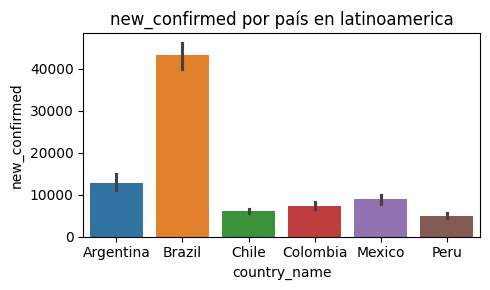

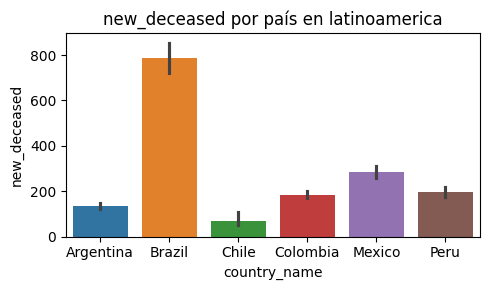

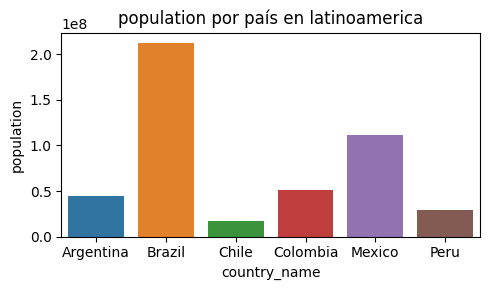

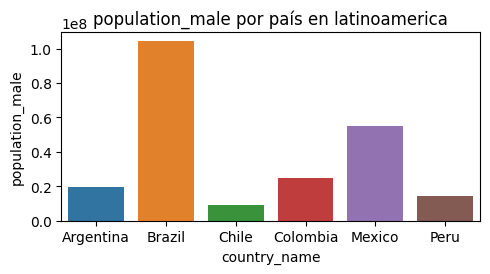

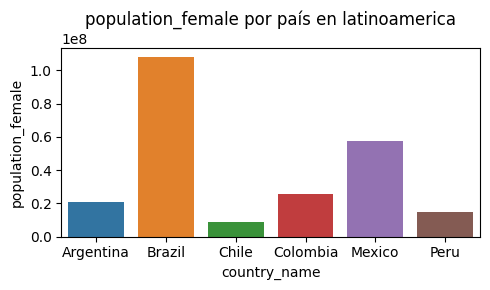

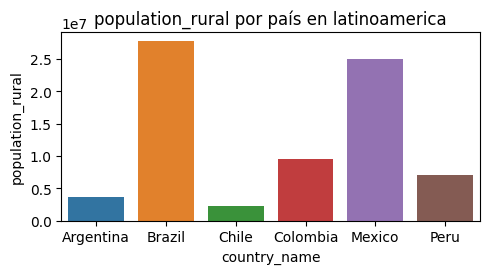

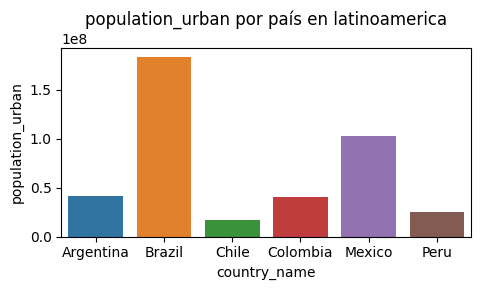

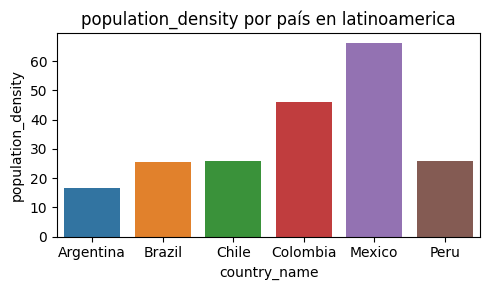

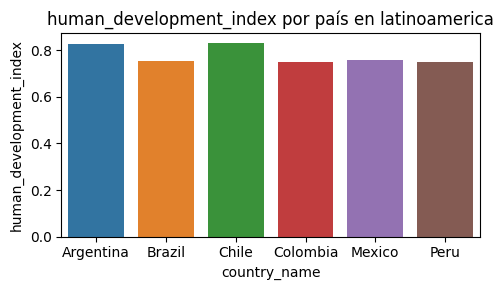

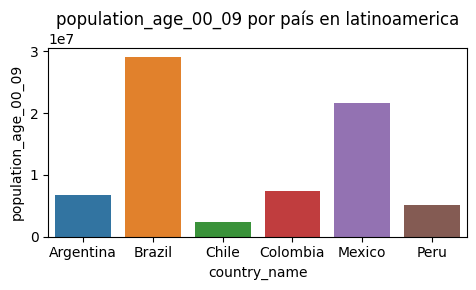

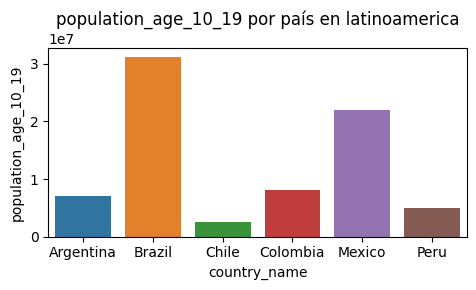

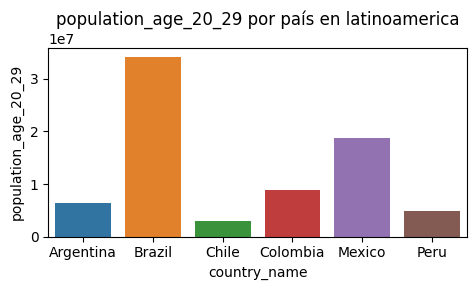

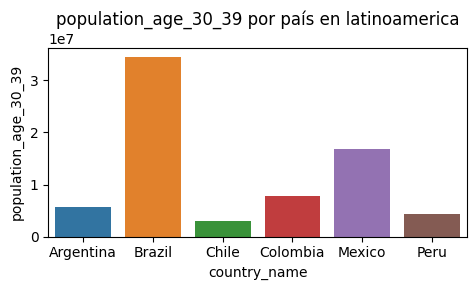

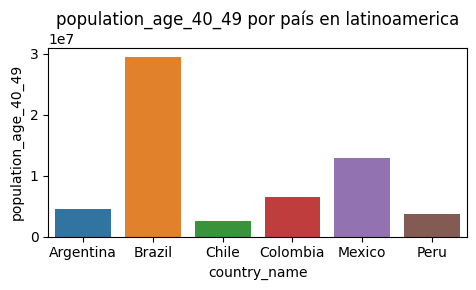

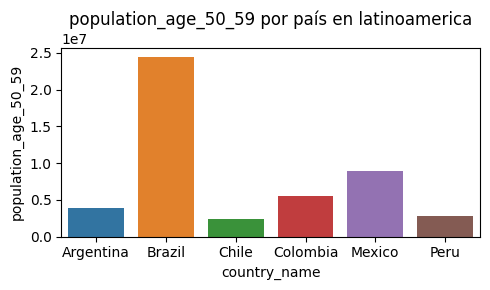

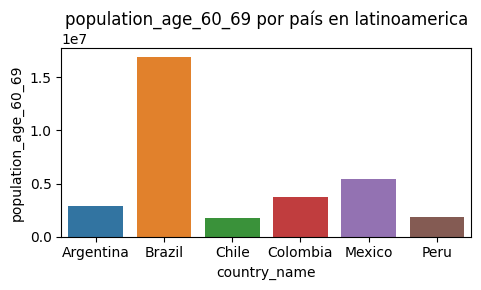

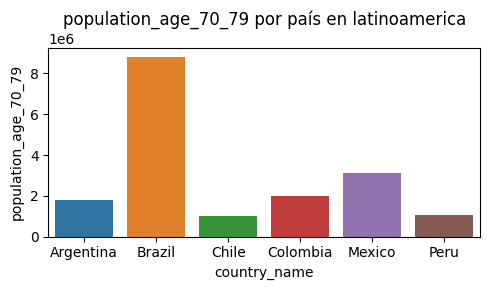

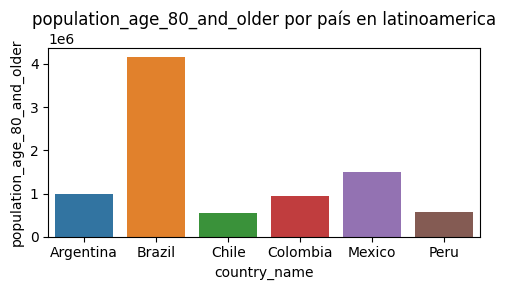

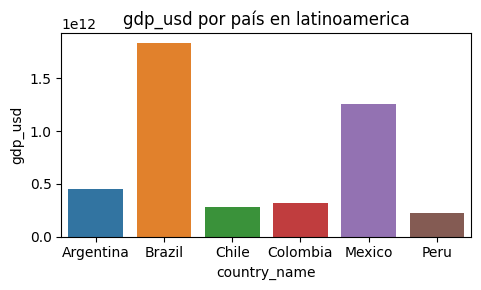

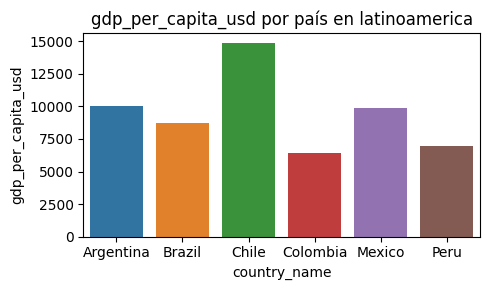

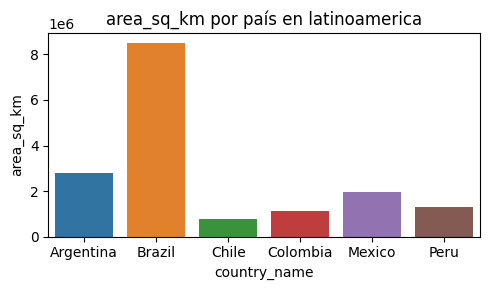

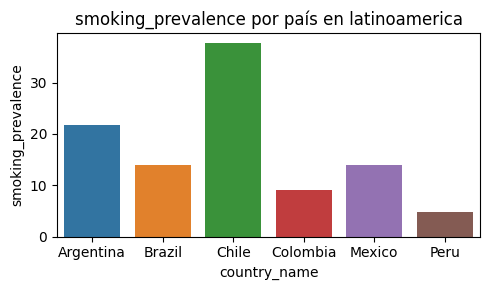

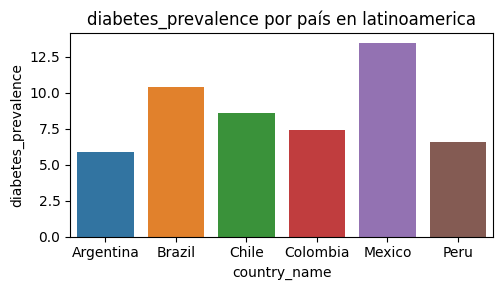

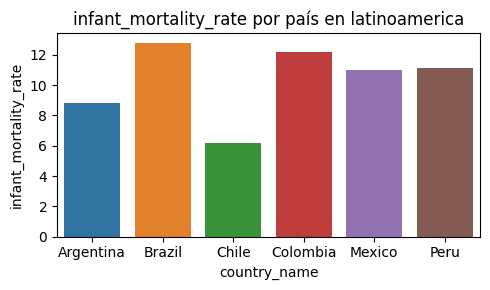

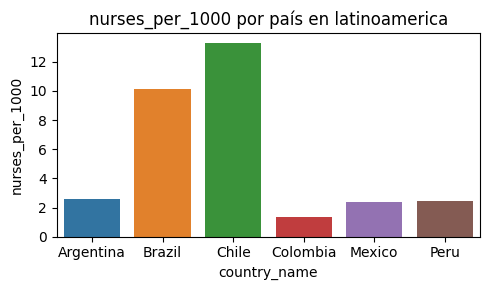

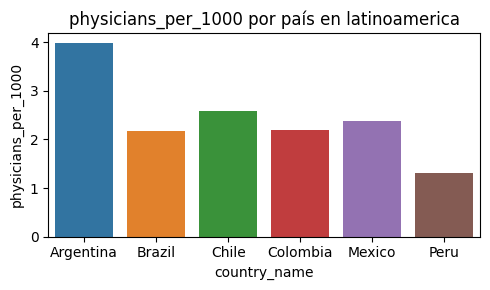

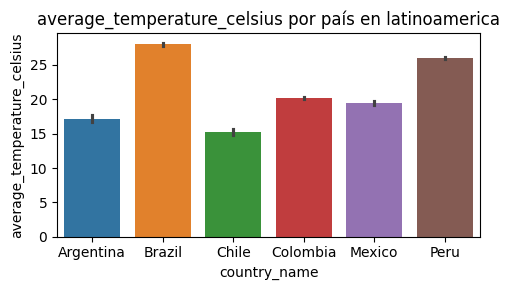

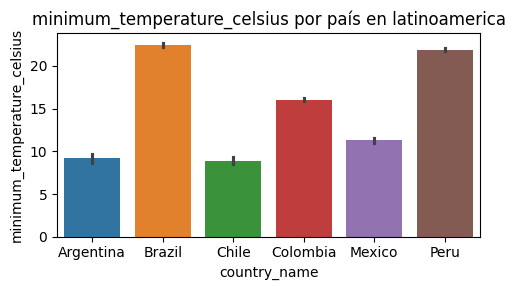

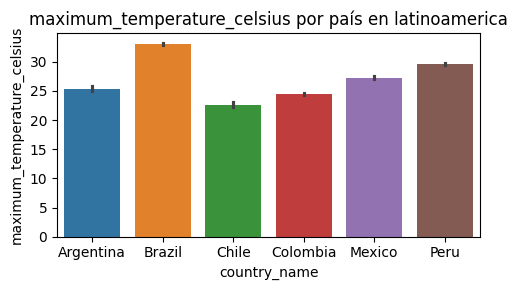

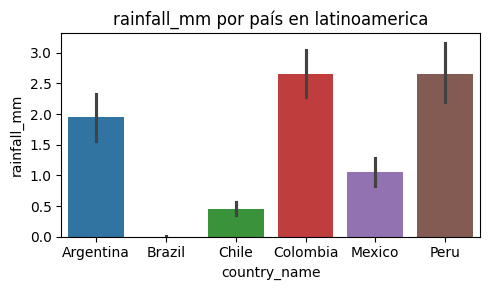

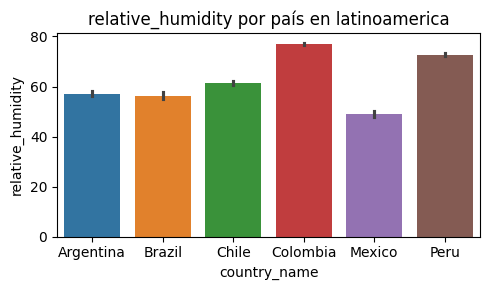

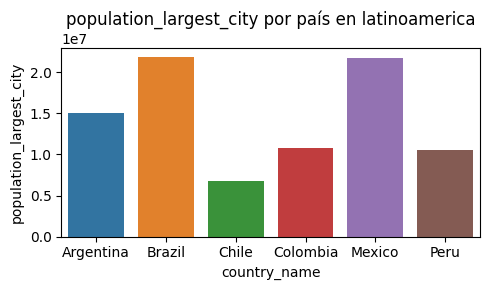

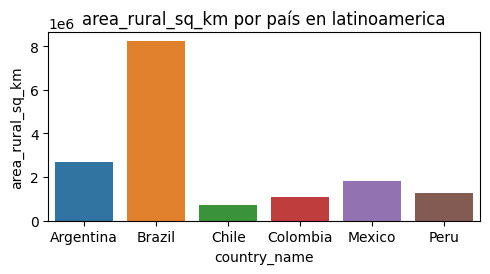

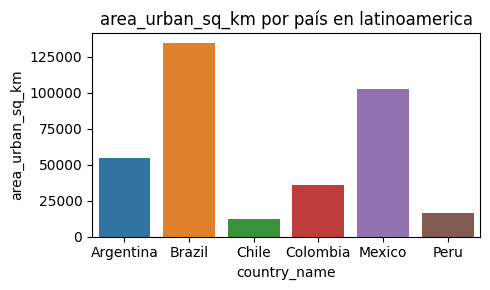

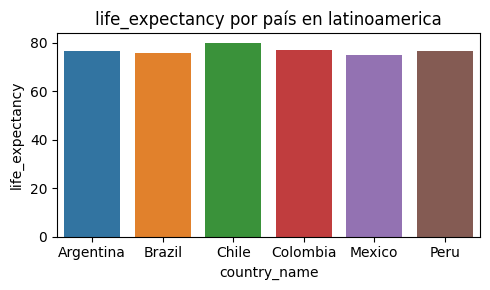

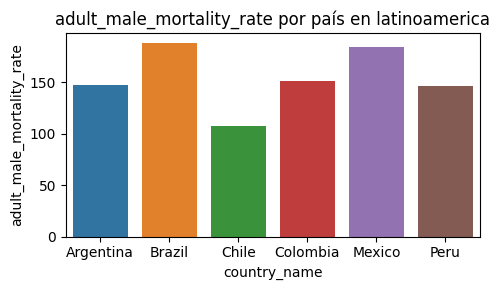

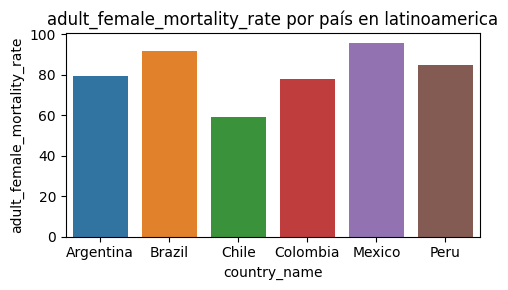

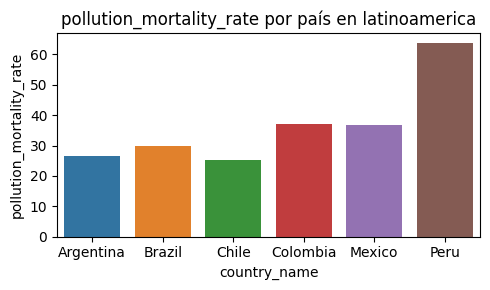

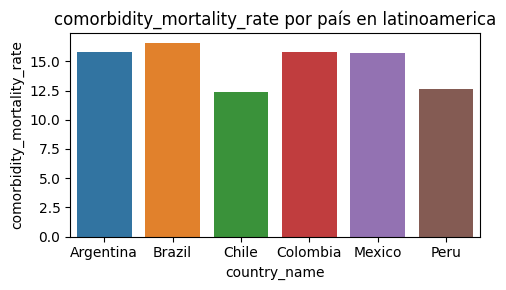

In [6]:
for i in data_latinoamerica_paises.columns:
    if i not in ['location_key', 'date', 'country_code', 'country_name', 'latitude', 'longitude', 'cumulative_confirmed', 
                 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'cumulative_recovered', 'new_recovered']:
        fig, ax = plt.subplots(figsize=(5, 3))
        sns.barplot(data=data_latinoamerica_paises, x='country_name', y=i, ax=ax, hue='country_name')
        plt.title(f'{i} por país en latinoamerica')
        plt.tight_layout()
        plt.show()

+ Matriz de correlación, trata de crear una submascara para solo tomar una parte del gráfico y filtrar por los valores mayores a 0.5:

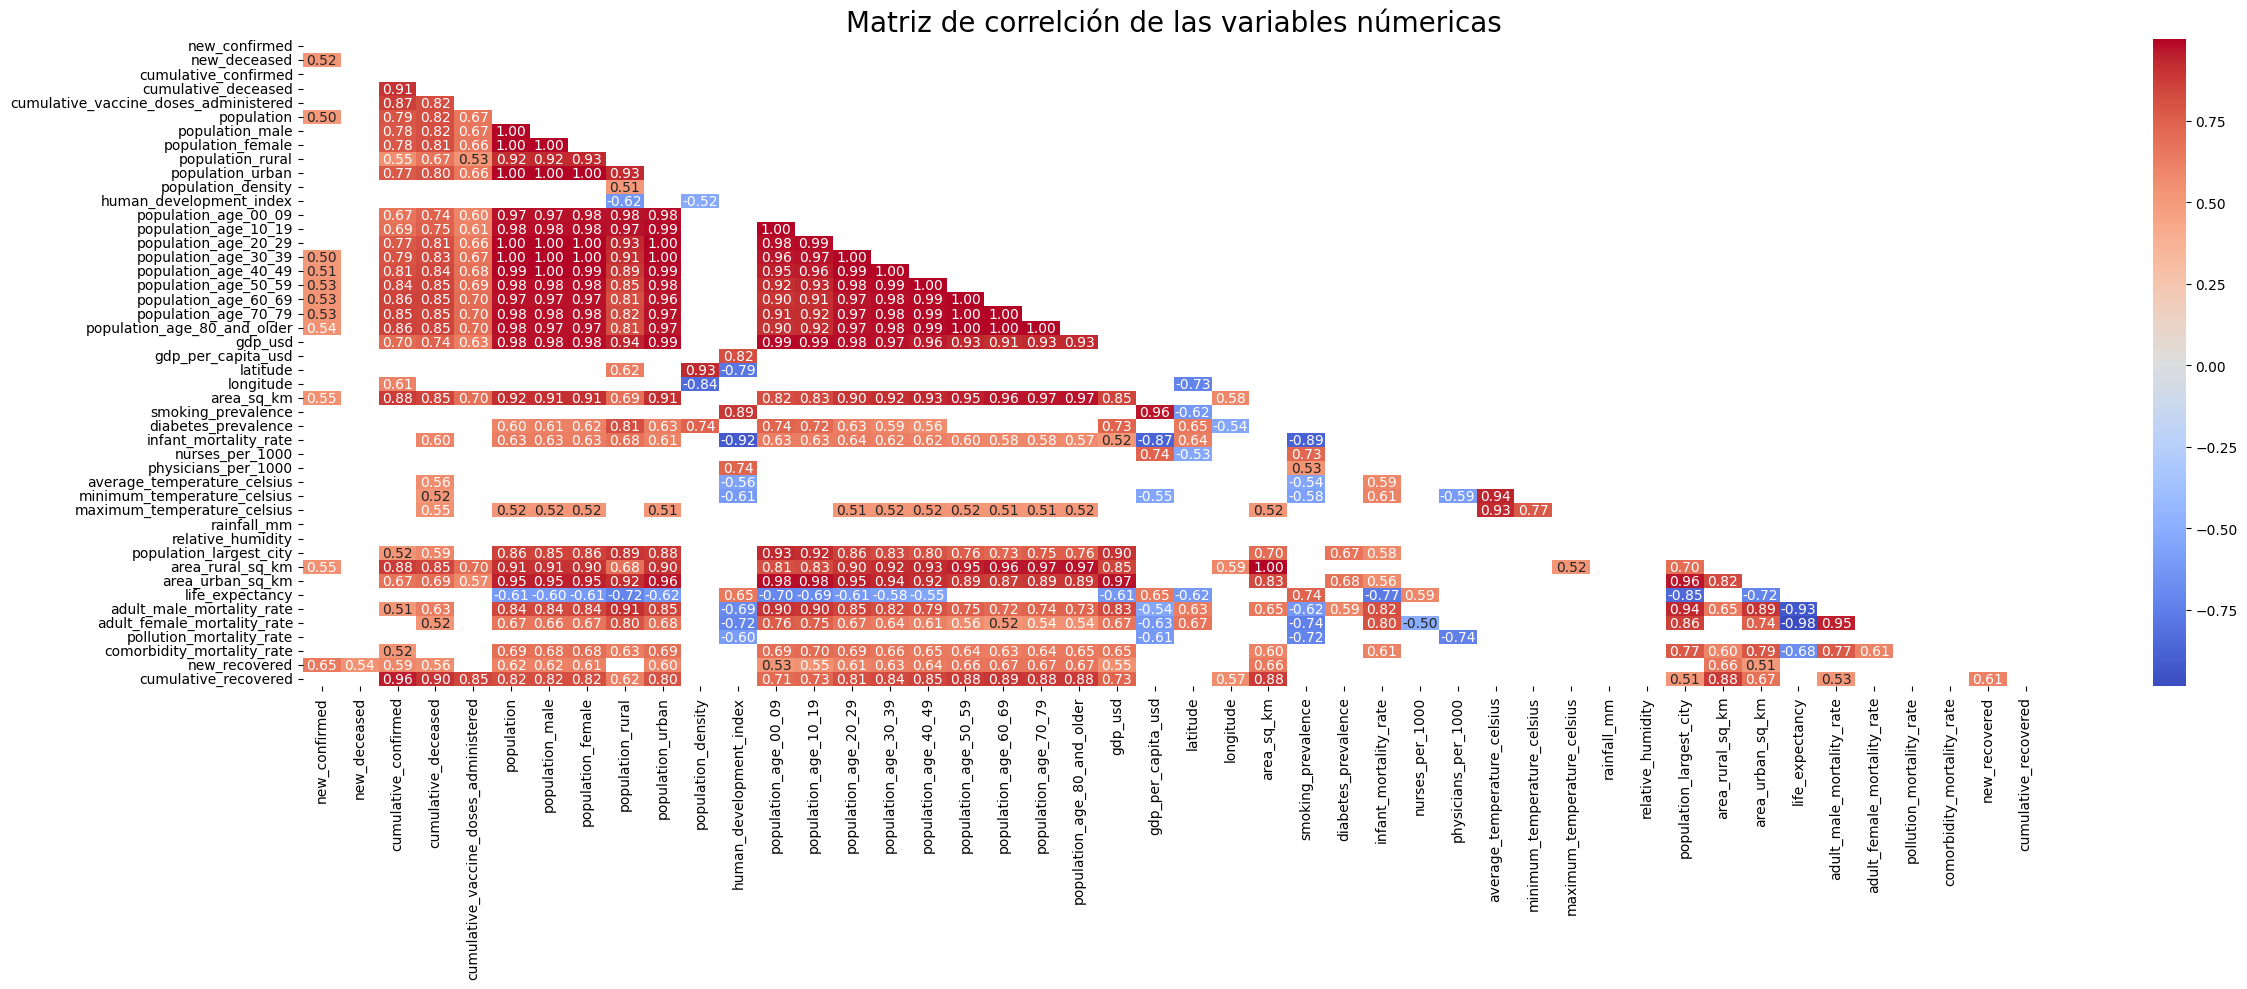

In [7]:
# Se crea la matriz de correlación de las variables númericas
columnas_numericas = data_latinoamerica_paises.select_dtypes(include=['float64','int64']).columns
matrix_correlacion = data_latinoamerica_paises[columnas_numericas].corr()

# Creamos la máscara para solo mostrar el triángulo inferior:
mascara = np.triu(np.ones_like(matrix_correlacion, dtype=bool))

# Mostramos solo los valores superiores a 0.5
matrix_correlacion = matrix_correlacion[abs(matrix_correlacion)>abs(0.5)]

# Creamos la gráfica
fig, ax = plt.subplots(figsize=(25, 10))
sns.heatmap(data=matrix_correlacion, mask=mascara, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de correlción de las variables númericas', fontsize=20)
plt.tight_layout()
plt.show()


+ Histogramas de las variables que “Sí” tenga cambios de valores:

In [8]:
#paises_seleccionados=['Argentina', 'Chile', 'Colombia', 'Mexico', 'Peru', 'Brazil']
#Primero ponemos a la columna 'date' como indice para poder realizar un análisis de dato en el tiempo 
data_latinoamerica_paises['date'] = pd.to_datetime(data_latinoamerica_paises['date']) # nos asegurmos que sea del tipo de dato date
data_latinoamerica_paises.set_index('date', inplace=True) # indicamos que el indice sea 'date'
data_latinoamerica_paises.head()


location_key country_code country_name  new_confirmed  \
date                                                               
2021-01-02           AR           AR    Argentina         7767.0   
2021-01-03           AR           AR    Argentina         4934.0   
2021-01-04           AR           AR    Argentina        13953.0   
2021-01-05           AR           AR    Argentina        14085.0   
2021-01-06           AR           AR    Argentina        14496.0   

            new_deceased  cumulative_confirmed  cumulative_deceased  \
date                                                                  
2021-01-02         166.0             1670634.0              46688.0   
2021-01-03         157.0             1675568.0              46845.0   
2021-01-04         157.0             1689521.0              47002.0   
2021-01-05         160.0             1703606.0              47162.0   
2021-01-06         131.0             1718102.0              47293.0   

            cumulative_vaccine_doses_administered  population  \
date                                                            
2021-01-02                                20334.0  44938712.0   
2021-01-03                                20529.0  44938712.0   
2021-01-04                                25164.0  44938712.0   
2021-01-05                                29852.0  44938712.0   
2021-01-06                                34162.0  44938712.0   

            population_male  ...  population_largest_city  area_rural_sq_km  \
date                         ...                                              
2021-01-02       19523766.0  ...               15057273.0         2690269.0   
2021-01-03       19523766.0  ...               15057273.0         2690269.0   
2021-01-04       19523766.0  ...               15057273.0         2690269.0   
2021-01-05       19523766.0  ...               15057273.0         2690269.0   
2021-01-06       19523766.0  ...               15057273.0         2690269.0   

            area_urban_sq_km  life_expectancy  adult_male_mortality_rate  \
date                                                                       
2021-01-02           55032.0            76.52                    147.086   
2021-01-03           55032.0            76.52                    147.086   
2021-01-04           55032.0            76.52                    147.086   
2021-01-05           55032.0            76.52                    147.086   
2021-01-06           55032.0            76.52                    147.086   

            adult_female_mortality_rate  pollution_mortality_rate  \
date                                                                
2021-01-02                       79.483                      26.6   
2021-01-03                       79.483                      26.6   
2021-01-04                       79.483                      26.6   
2021-01-05                       79.483                      26.6   
2021-01-06                       79.483                      26.6   

            comorbidity_mortality_rate  new_recovered  cumulative_recovered  
date                                                                         
2021-01-02                        15.8            0.0                   0.0  
2021-01-03                        15.8            0.0                   0.0  
2021-01-04                        15.8            0.0                   0.0  
2021-01-05                        15.8            0.0                   0.0  
2021-01-06                        15.8            0.0                   0.0  

[5 rows x 49 columns]

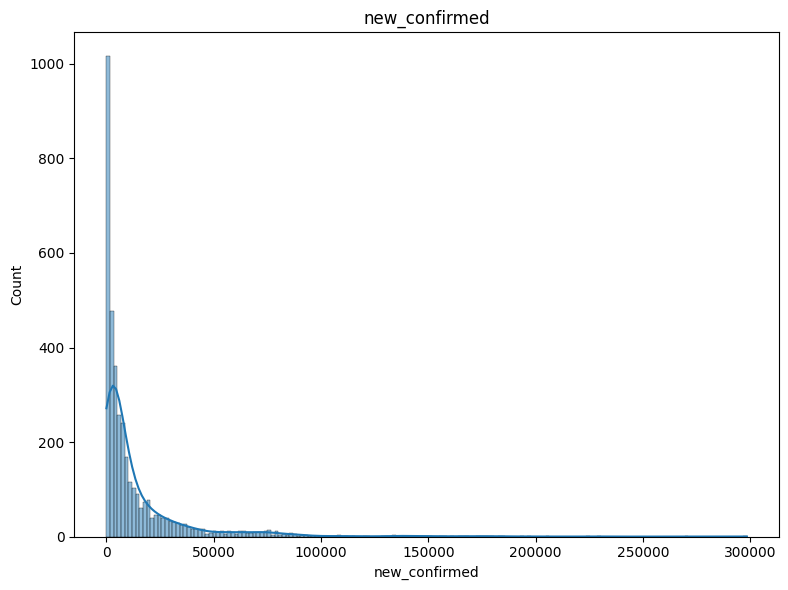

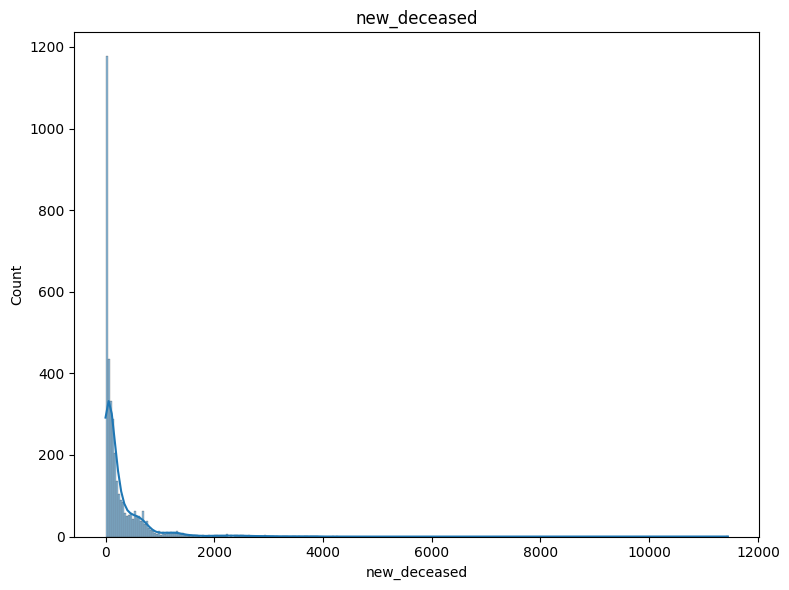

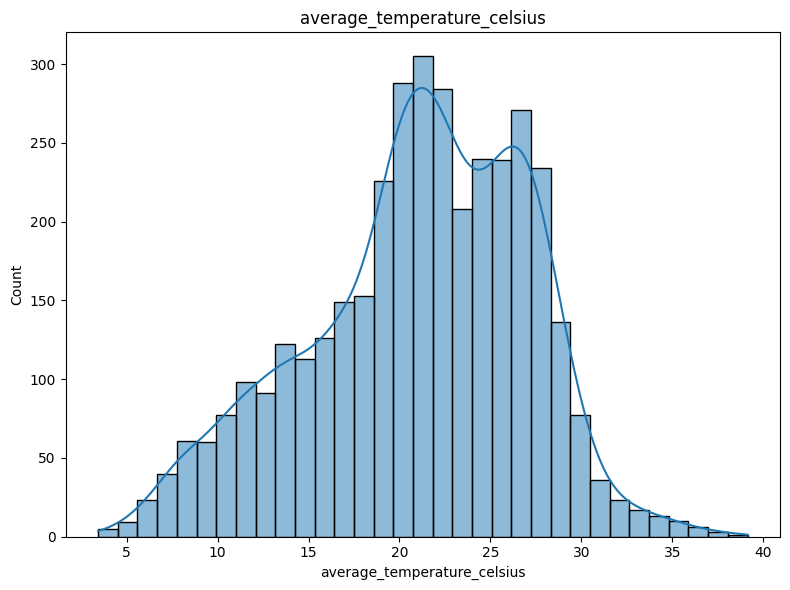

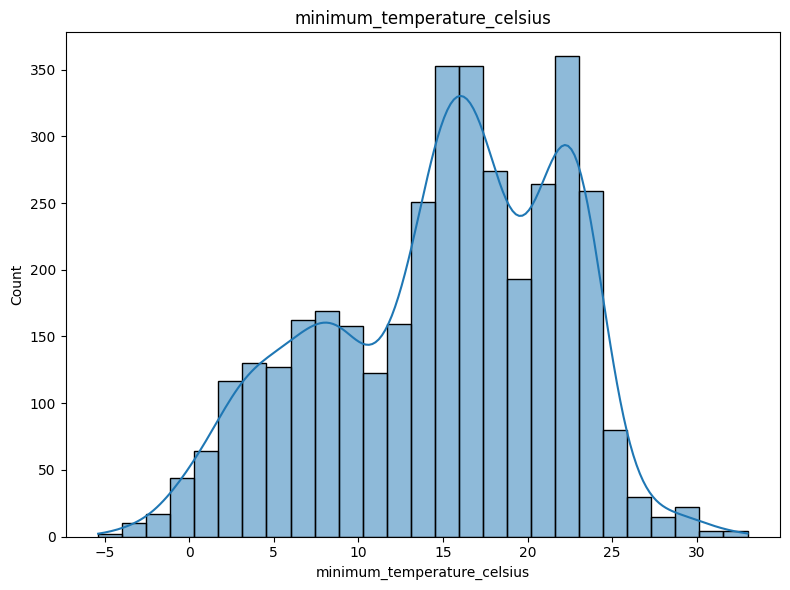

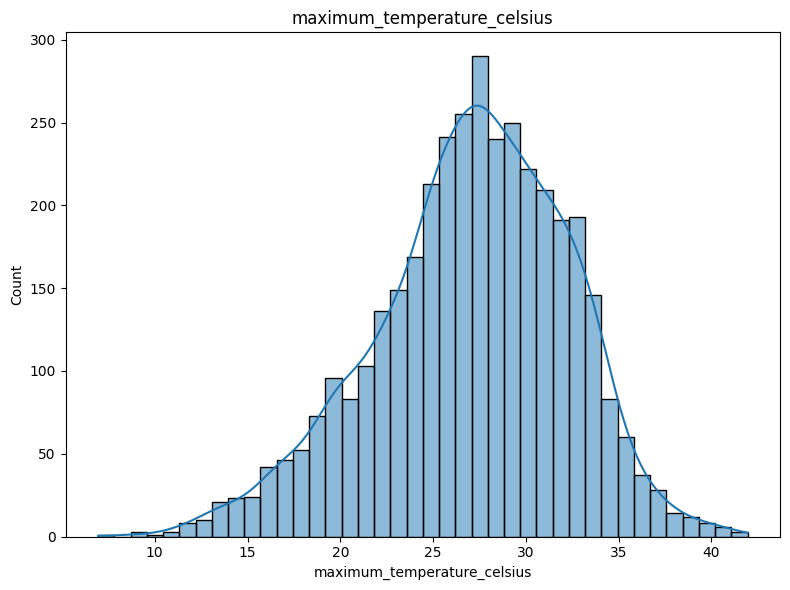

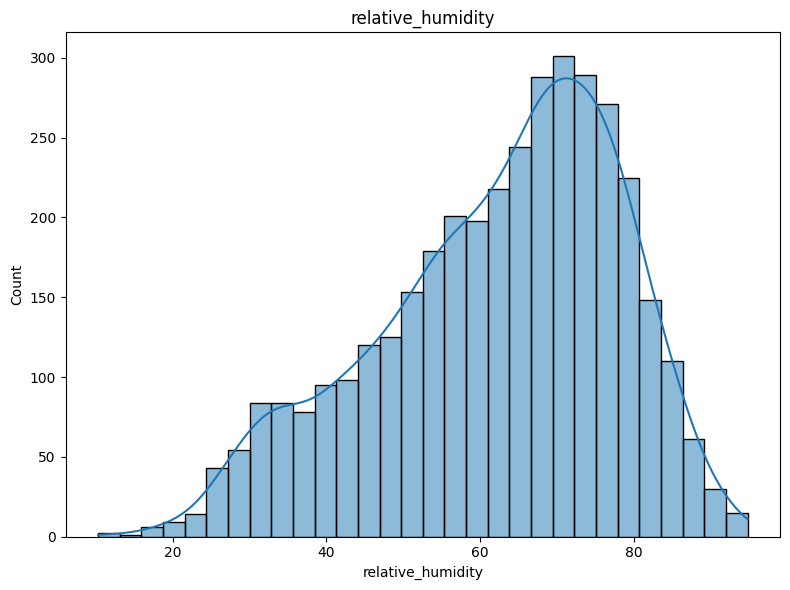

In [10]:
# Un primer acercamiento será realizar una matriz de correlación para ver si existe alguna relación entre las variables para tener en cuenta para un análisis posterior
# seleccionamos las variables númericas a analizar:
lista_columnas_9=['new_confirmed','new_deceased','cumulative_confirmed','cumulative_deceased','cumulative_vaccine_doses_administered','average_temperature_celsius','minimum_temperature_celsius', 'maximum_temperature_celsius','relative_humidity' ]
for i in data_latinoamerica_paises[lista_columnas_9]:
    if i not in ['location_key', 'date', 'country_code', 'country_name', 'latitude', 'longitude', 'cumulative_confirmed', 
                 'cumulative_deceased', 'cumulative_vaccine_doses_administered', 'cumulative_recovered']:
        fig, ax = plt.subplots(figsize=(8,6))
        sns.histplot(data_latinoamerica_paises[i],kde=True)
        plt.title(i)
        plt.tight_layout()
        plt.show()  
        
# ?

        

+ Diagrama de dispersión de la temperatura media contra los casos confirmados.

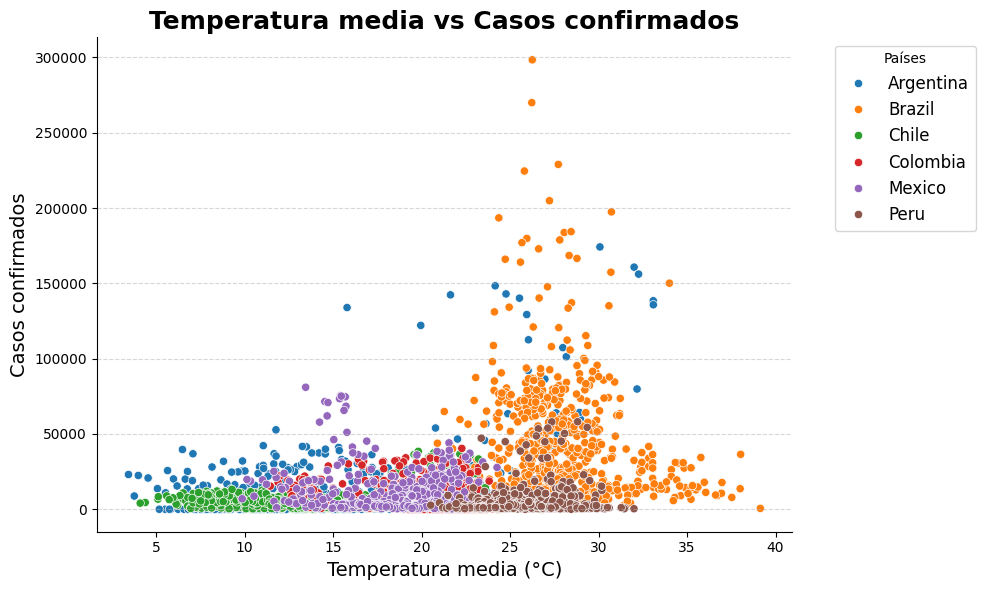

In [11]:
# Creamos la figura que contendrá el gráfico:
fig, ax = plt.subplots(figsize=(10,6))

# Creamos el gráfico de dispersión:
sns.scatterplot(data=data_latinoamerica_paises, x='average_temperature_celsius', 
                y='new_confirmed',hue='country_name')

# Configuramos la tipografía:
plt.rc('font', family='sans-serif')

# Quitamos el borde derecho y superior del gráfico:
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Cambiamos el título de la leyenda:
ax.legend(bbox_to_anchor=(1.05,1),title='Países', loc='upper left', fontsize=12)

# Agregamos grid:
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

# Colocamos el títulos y etiqueta de los ejes:
plt.title('Temperatura media vs Casos confirmados', fontsize=18, fontweight='bold')
plt.xlabel('Temperatura media (°C)', fontsize=14)
plt.ylabel('Casos confirmados', fontsize=14)

# Ajustamos márgenes:
plt.tight_layout()

# Mostramos la figura:
plt.show()

+ Diagrama de dispersión de la temperatura media contra las muertes confirmadas.  

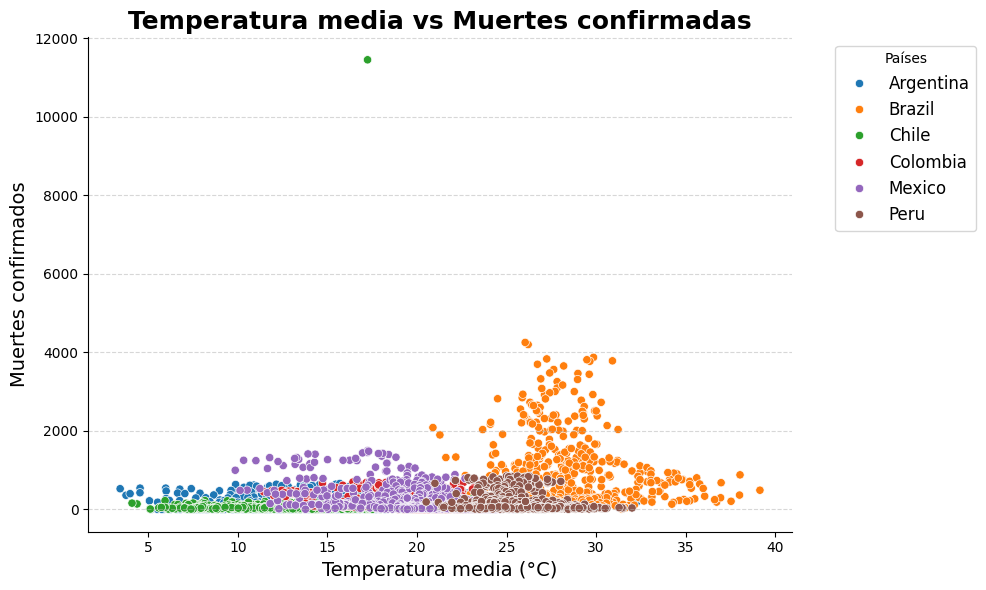

In [12]:
# Creamos la figura que contendrá el gráfico:
fig, ax = plt.subplots(figsize=(10,6))

# Creamos el gráfico de dispersión:
sns.scatterplot(data=data_latinoamerica_paises, x='average_temperature_celsius', 
                y='new_deceased',hue='country_name')

# Quitamos el borde derecho y superior del gráfico:
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Configuramos la leyenda del gráfico:
ax.legend(bbox_to_anchor=(1.05,1),title='Países', loc='upper left', fontsize=12)

# Agregamos grilla al gráfico:
ax.grid(True, axis='y', linestyle='--', alpha=0.5)

# Colocamos el título y etiqueta de los ejes:
plt.title('Temperatura media vs Muertes confirmadas', fontsize=18, fontweight='bold')
ax.set_xlabel('Temperatura media (°C)', fontsize=14) # es importante tomar en cuenta en que objeto estamos trtabajando
#plt.xlabel('Temperatura media (°C)', fontsize=14)

plt.ylabel('Muertes confirmados', fontsize=14)

# Ajustamos márgenes:
plt.tight_layout()

# Mostramos la figura:
plt.show()

+ Comportamiento de las dosis administradas de todos los países (Valor medio):

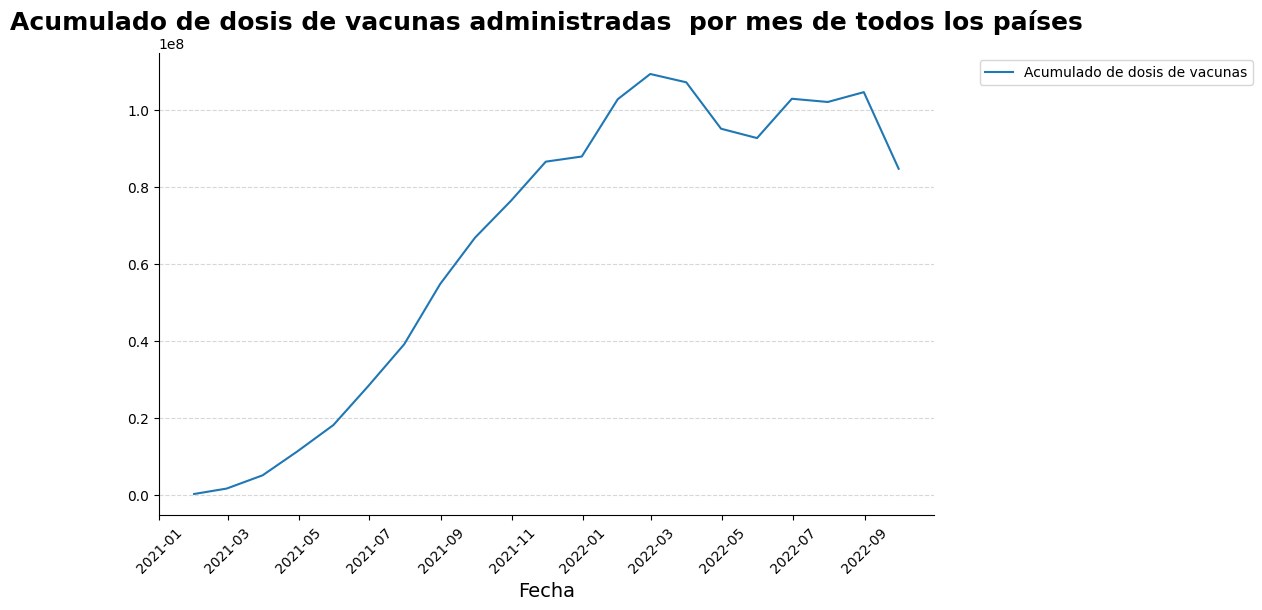

In [13]:
#grafico creado con sns.lineplot
fig, ax = plt.subplots(figsize=(10,6))
data= data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered']
sns.lineplot(x=data.index, y=data.values, ax=ax, label='Acumulado de dosis de vacunas' )
plt.rc('font', family='sans-serif')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.title('Acumulado de dosis de vacunas administradas  por mes de todos los países',fontsize=18, fontweight='bold')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('Fecha', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45)
plt.show()

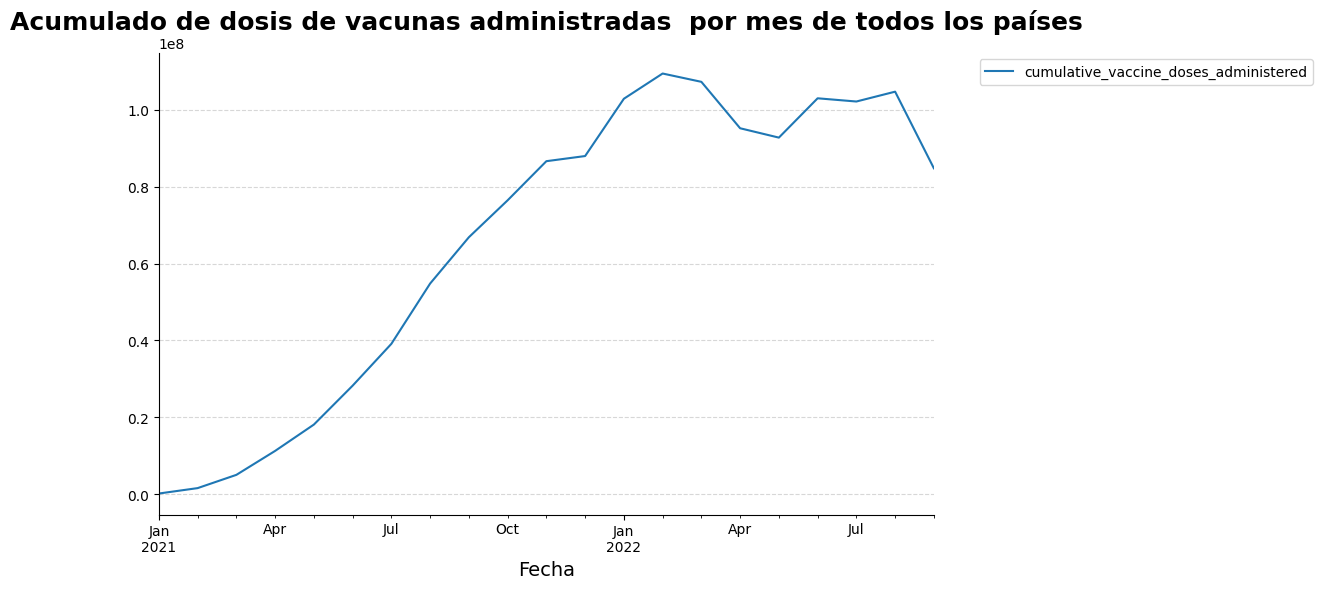

In [14]:
#gráfico creado directamente con .plot()
fig, ax = plt.subplots(figsize=(10,6))
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
#sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'])
plt.rc('font', family='sans-serif')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.title('Acumulado de dosis de vacunas administradas  por mes de todos los países',fontsize=18, fontweight='bold')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.xlabel('Fecha', fontsize=14)
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
#plt.xticks(rotation=45)
plt.show()

+ Evolución de dosis administradas por mes de cada país.

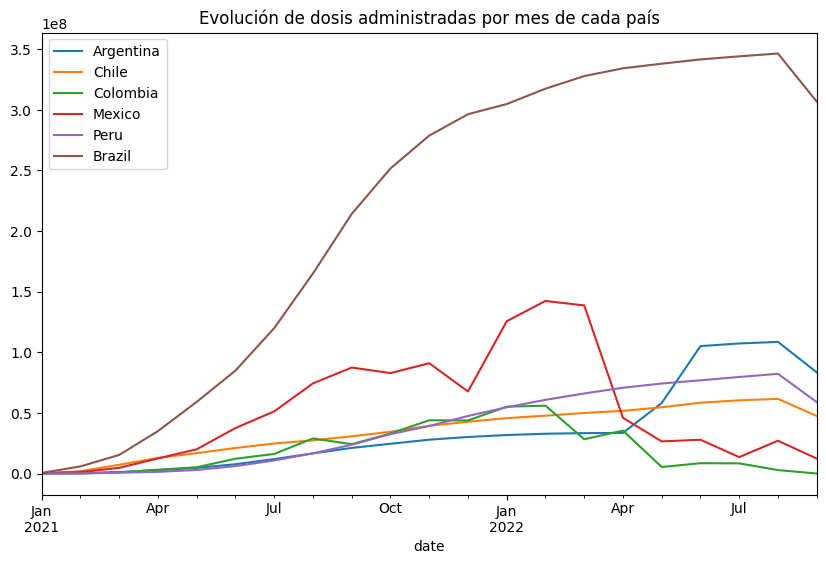

In [15]:
fig, ax = plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_vaccine_doses_administered'].plot()
plt.title('Evolución de dosis administradas por mes de cada país')
plt.legend(bbox_to_anchor=(1.5,1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()   

+ Muertes por mes de cada país.

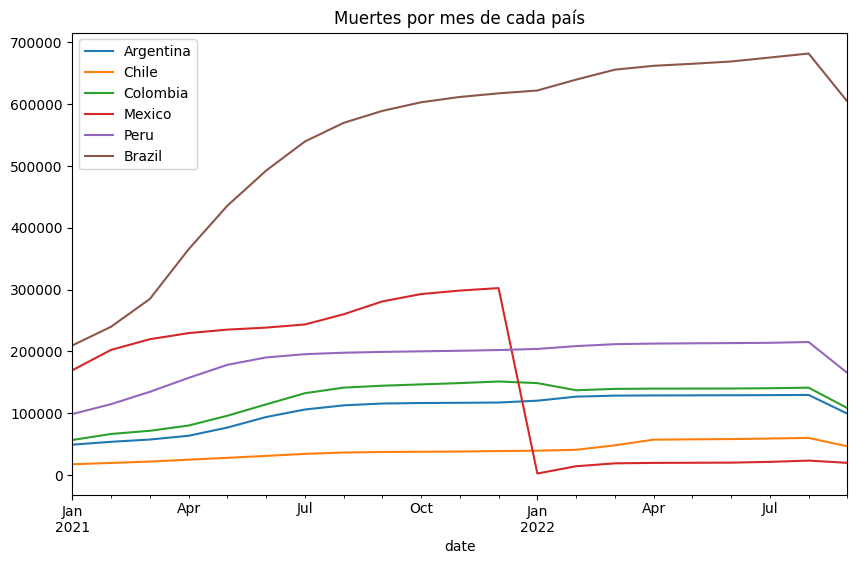

In [16]:
fig, ax = plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_deceased'].plot() #'new_deceased'
plt.title('Muertes por mes de cada país')
plt.legend(bbox_to_anchor=(1.5,1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

In [17]:
data= data_latinoamerica_paises[data_latinoamerica_paises['country_name']=='Mexico'].resample('ME').mean(numeric_only=True)['cumulative_deceased']
print(data.index)
print(data.values)

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31',
               '2022-01-31', '2022-02-28', '2022-03-31', '2022-04-30',
               '2022-05-31', '2022-06-30', '2022-07-31', '2022-08-31',
               '2022-09-30'],
              dtype='datetime64[ns]', name='date', freq='ME')
[169411.46666667 202445.28571429 219621.70967742 229530.83333333
 235151.41935484 238408.4        243468.16129032 259945.29032258
 280773.36666667 292649.35483871 298322.9        302293.4516129
   2438.87096774  14207.64285714  18904.06451613  19634.5
  19840.70967742  20053.          21286.35483871  23339.22580645
  19705.41176471]


+ Casos confirmados por mes de cada país.

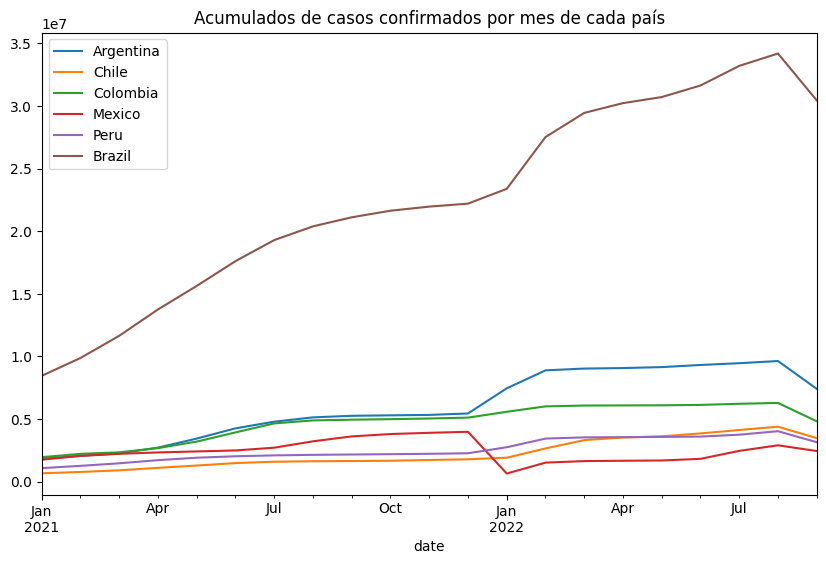

In [18]:
fig, ax = plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_confirmed'].plot() 
plt.title('Acumulados de casos confirmados por mes de cada país')
plt.legend(bbox_to_anchor=(1.5,1), loc='upper left')
plt.legend(paises_seleccionados)
plt.show()

+ Recuperaciones de casos por mes de cada país.

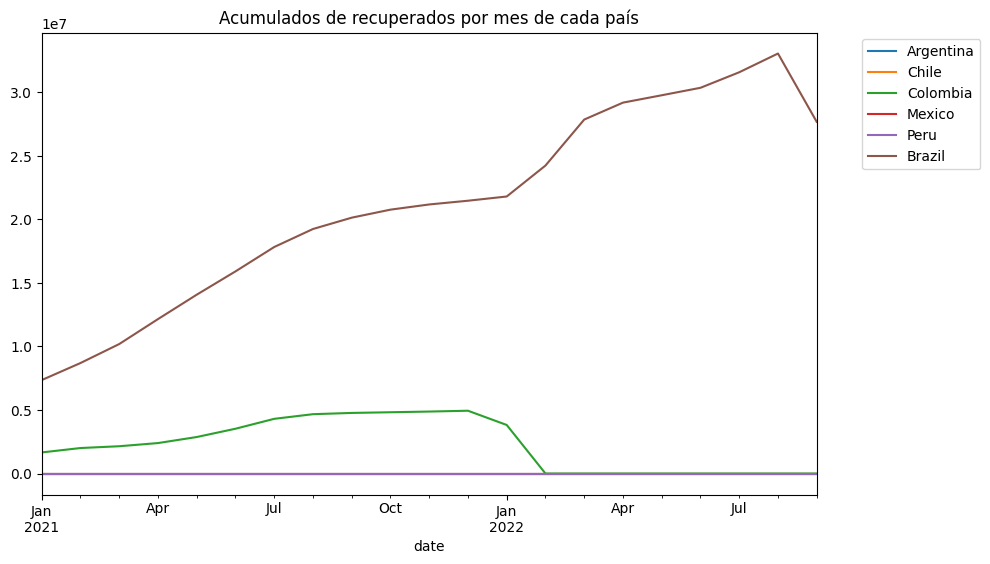

In [19]:
fig, ax = plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['cumulative_recovered'].plot() 
plt.title('Acumulados de recuperados por mes de cada país')
#plt.legend(bbox_to_anchor=(1.5,1), loc='upper left')
plt.legend(paises_seleccionados, bbox_to_anchor=(1.05,1))
plt.show() 

+ Comparación del Número de Casos Nuevos entre Países.

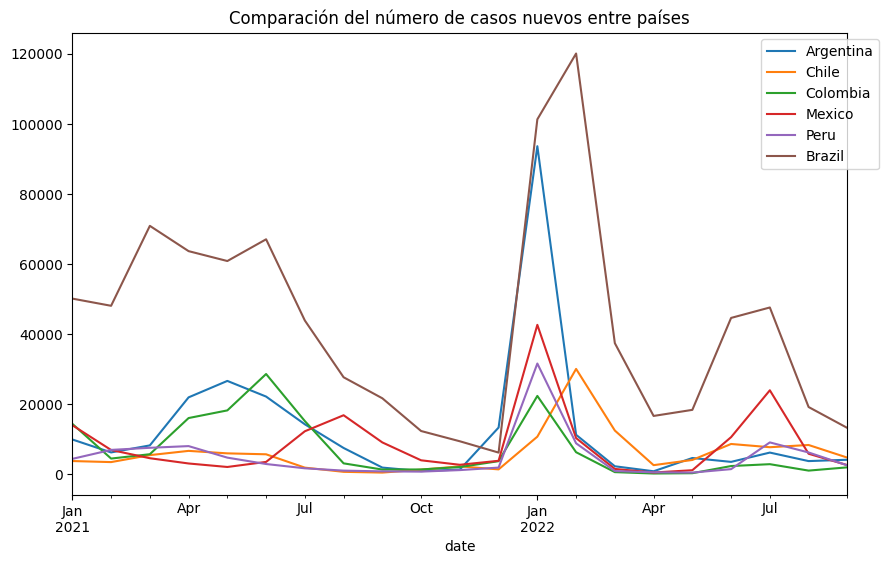

In [20]:
fig, ax = plt.subplots(figsize=(10,6))
for pais in paises_seleccionados:
    data_latinoamerica_paises[data_latinoamerica_paises['country_name']==pais].resample('ME').mean(numeric_only=True)['new_confirmed'].plot() 
plt.title('Comparación del número de casos nuevos entre países')
plt.legend(paises_seleccionados, bbox_to_anchor=(1.05,1))
plt.show() 

+ Dosis acumuladas por país

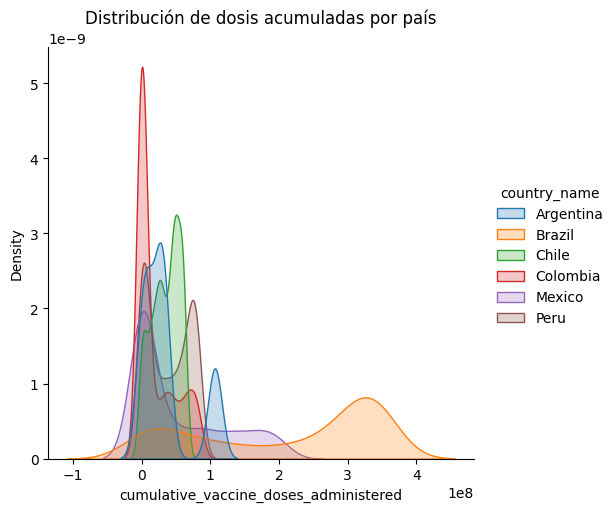

In [21]:
sns.displot(data_latinoamerica_paises, x='cumulative_vaccine_doses_administered', hue='country_name', kind='kde', fill=True)
plt.title('Distribución de dosis acumuladas por país')
plt.show()

+ Boxplot de temperatura media de cada país.

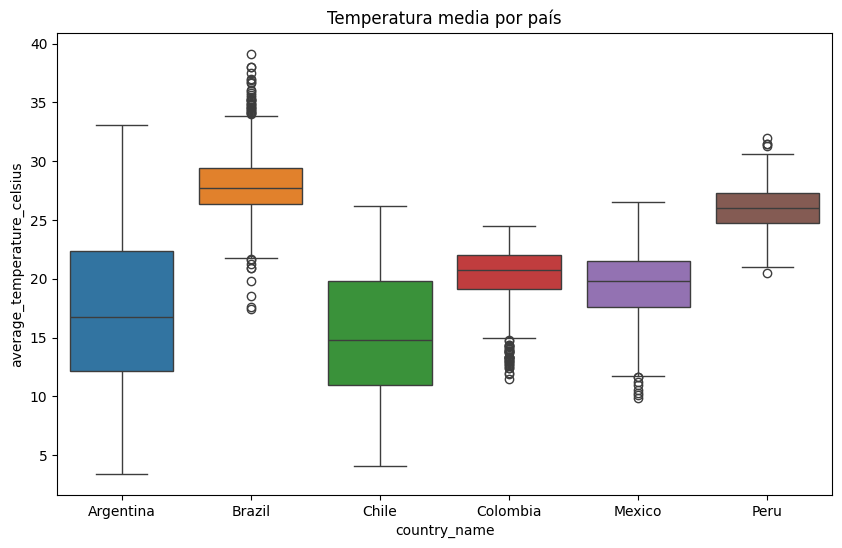

In [22]:
fig, ax = plt.subplots(figsize=(10,6))
sns.boxplot(data=data_latinoamerica_paises, x='country_name', y='average_temperature_celsius', hue='country_name')
plt.title('Temperatura media por país')
plt.show()

+ Violinplot de las variables que “Sí” tenga cambios de valores.

In [23]:
columnas_mayores_6=[]
for i in data_latinoamerica_paises.columns:
    if i not in ['location_key','date','country_code','latitude','longitude']:
                 if data_latinoamerica_paises[i].nunique()>6:
                    columnas_mayores_6.append(i)
columnas_mayores_6.append('country_name')
columnas_mayores_6              


['new_confirmed',
 'new_deceased',
 'cumulative_confirmed',
 'cumulative_deceased',
 'cumulative_vaccine_doses_administered',
 'average_temperature_celsius',
 'minimum_temperature_celsius',
 'maximum_temperature_celsius',
 'rainfall_mm',
 'relative_humidity',
 'new_recovered',
 'cumulative_recovered',
 'country_name']

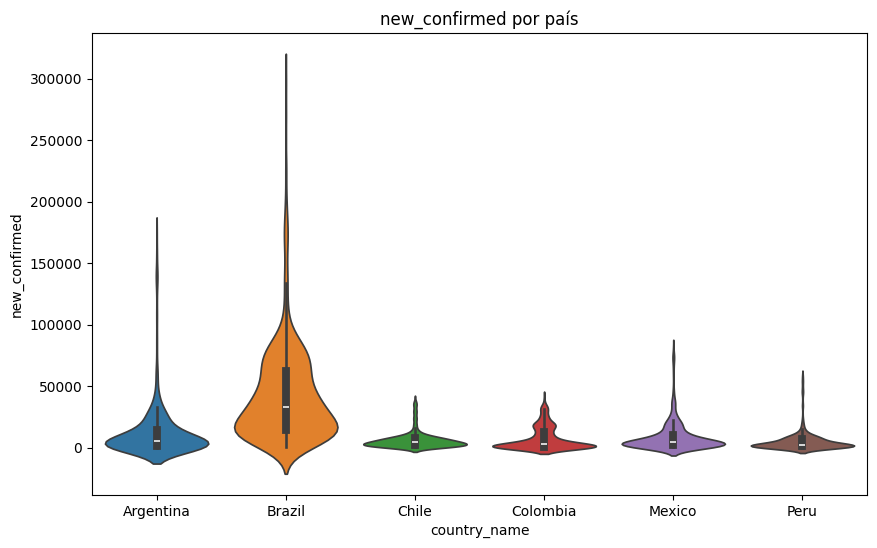

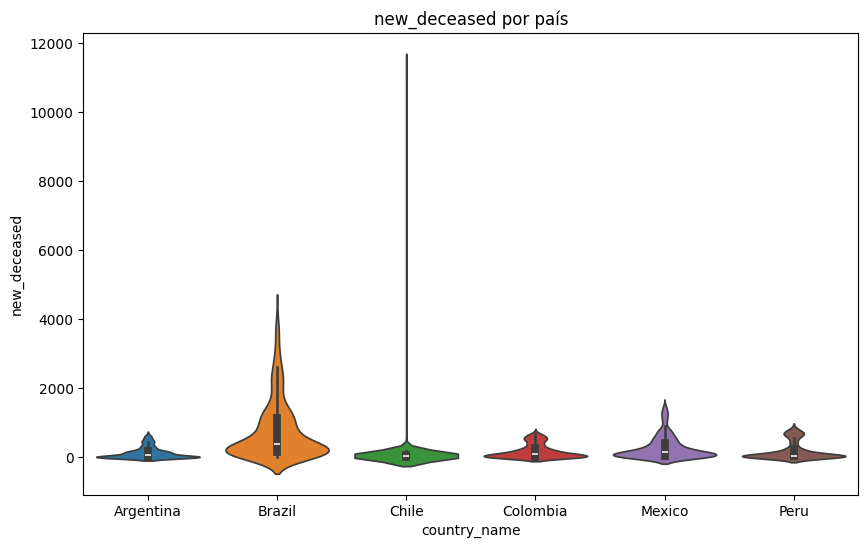

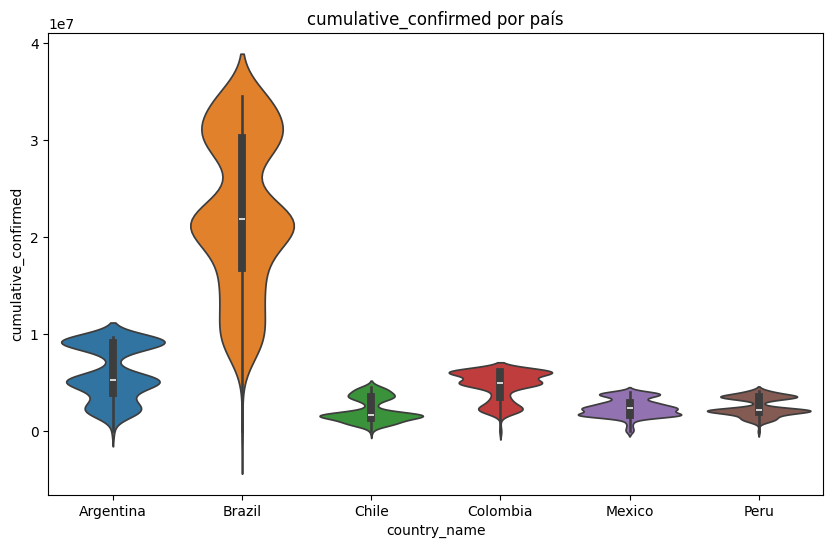

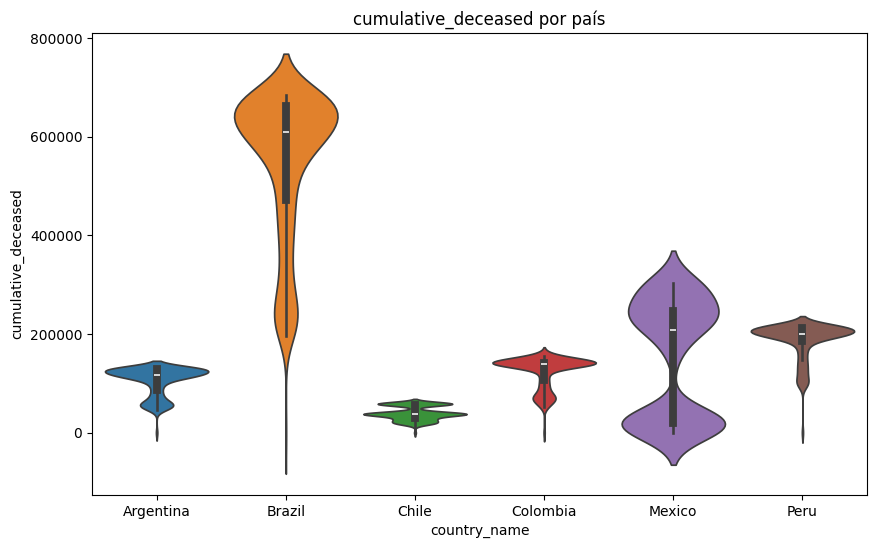

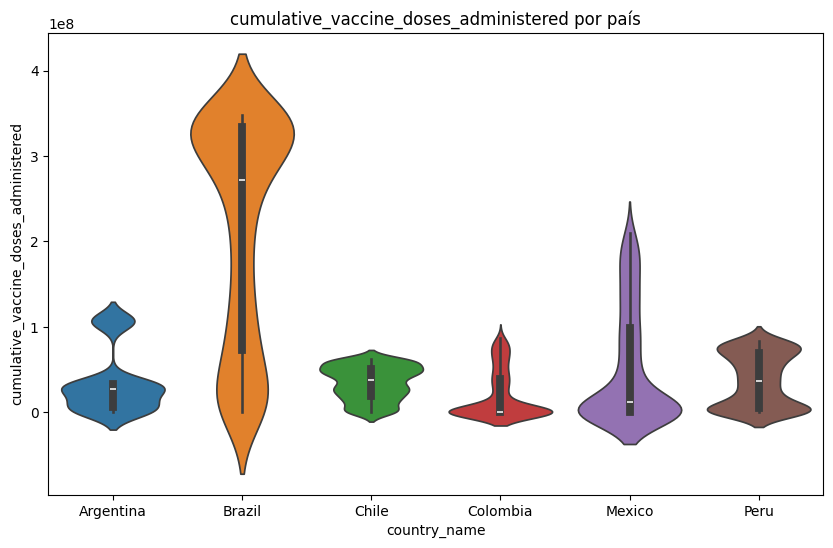

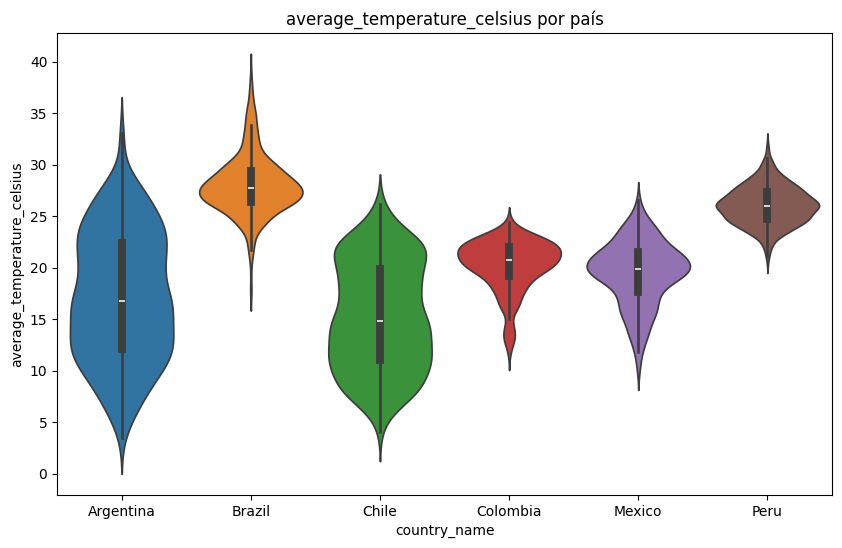

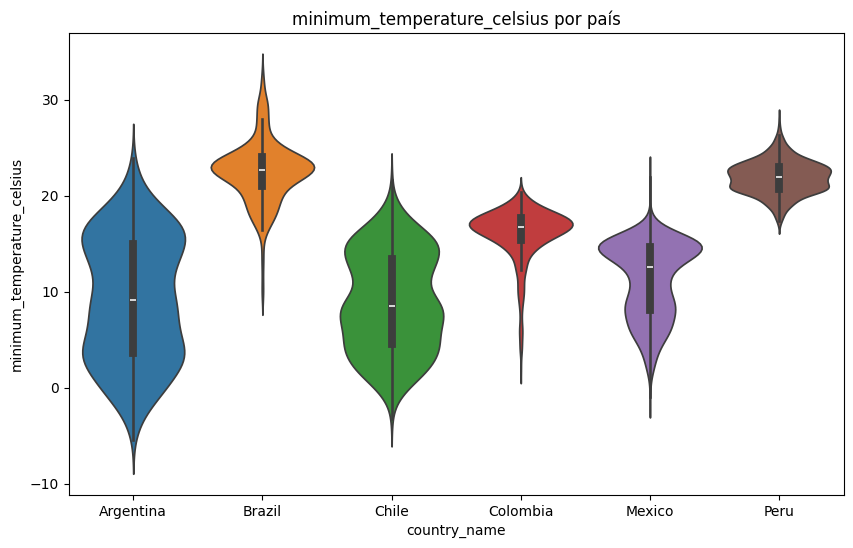

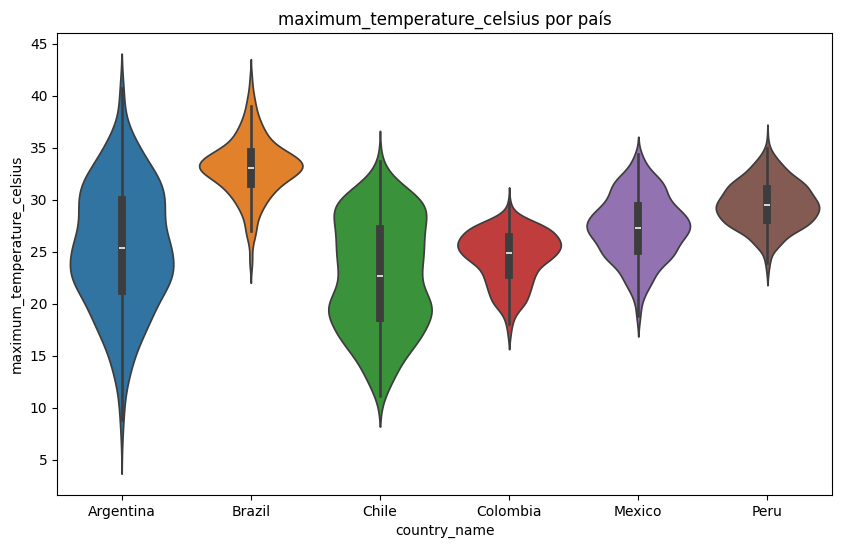

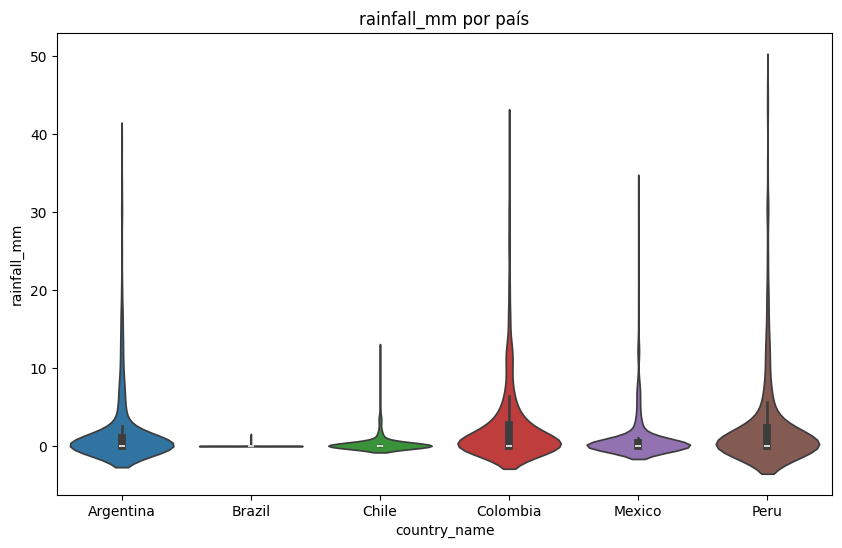

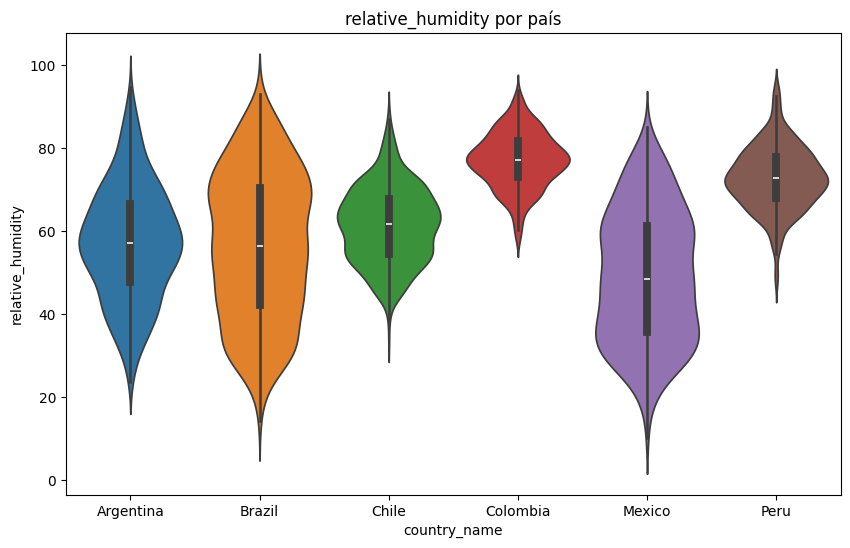

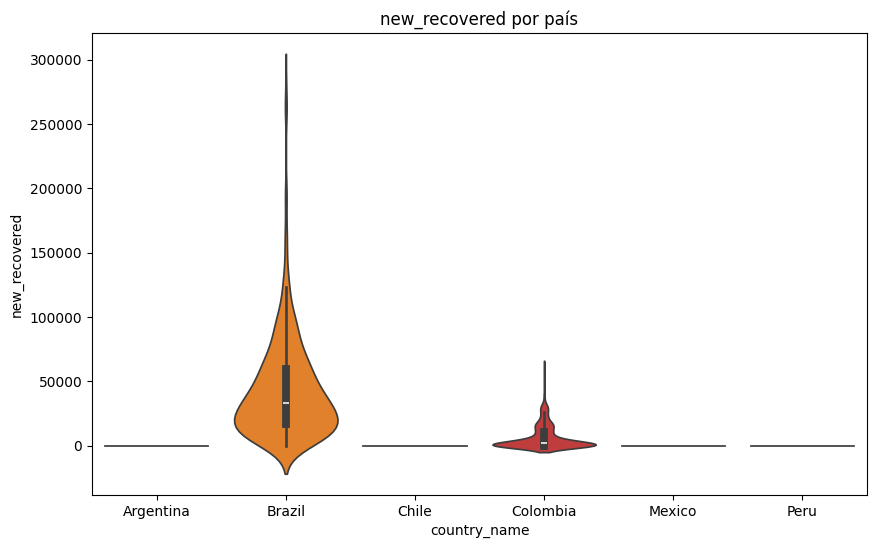

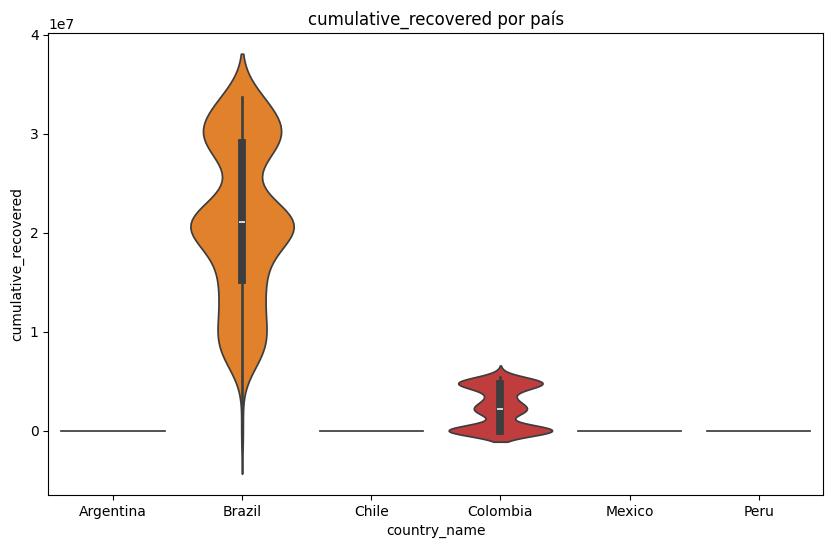

In [25]:
for i in data_latinoamerica_paises_mayores_6.columns:
    if i not in ['location_key','date','country_code','latitude','longitude','country_name']:
        fig, ax= plt.subplots(figsize=(10,6))
        sns.violinplot(data_latinoamerica_paises_mayores_6, x='country_name', y=i, hue='country_name') 
        plt.title(f'{i} por país')
        plt.show()

+ Distribución de la población por grupos de edad.

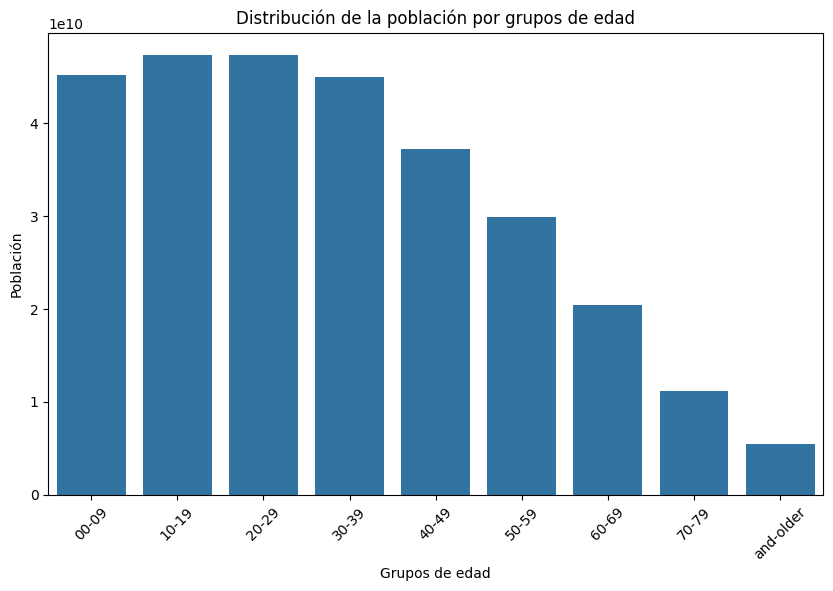

In [30]:
#data_latinoamerica_paises.columns
columnas_por_edad=['population_age_00_09', 'population_age_10_19', 'population_age_20_29',
       'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
       'population_age_60_69', 'population_age_70_79',
       'population_age_80_and_older']
distribucion_por_edad = data_latinoamerica_paises[columnas_por_edad].sum()

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(distribucion_por_edad)
plt.title('Distribución de la población por grupos de edad')
plt.xlabel('Grupos de edad')
plt.ylabel('Población')
plt.xticks(range(len(columnas_por_edad)), [col.split('_')[-2] + '-' + col.split('_')[-1] for col in columnas_por_edad],rotation=45)
plt.show()

+ Diagrama de barras apilado de comparación de la tasa de mortalidad masculina vs. femenina por país.

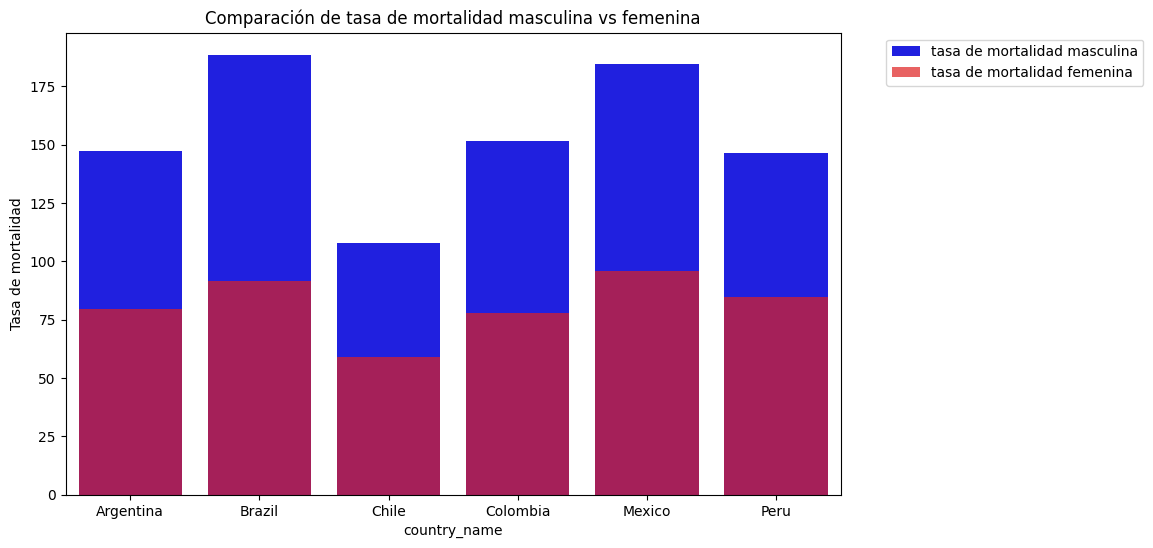

In [27]:
plt.figure(figsize=(10,6))
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='adult_male_mortality_rate', color='blue', label='tasa de mortalidad masculina')
sns.barplot(data=data_latinoamerica_paises, x='country_name', y='adult_female_mortality_rate', color='red', alpha=0.7, label='tasa de mortalidad femenina')
plt.ylabel('Tasa de mortalidad')
plt.title('Comparación de tasa de mortalidad masculina vs femenina')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

+ Matriz de correlación de indicadores demográficos y de salud.

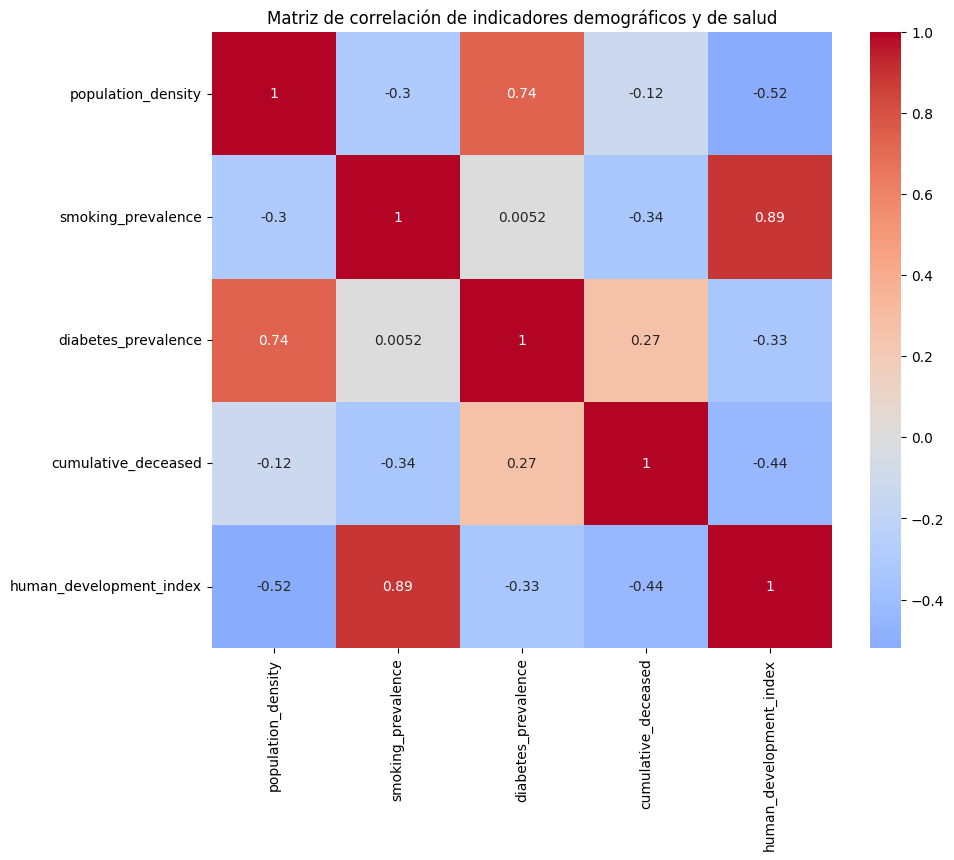

In [28]:
columnas=['population_density', 'smoking_prevalence', 'diabetes_prevalence', 'cumulative_deceased', 
          'human_development_index']
matrix_correlacion2=data_latinoamerica_paises[columnas].corr()
plt.figure(figsize=(10,8))
sns.heatmap(matrix_correlacion2, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de correlación de indicadores demográficos y de salud')
plt.show()

+ Comparación de la Prevalencia de Diabetes y la Tasa de Mortalidad.

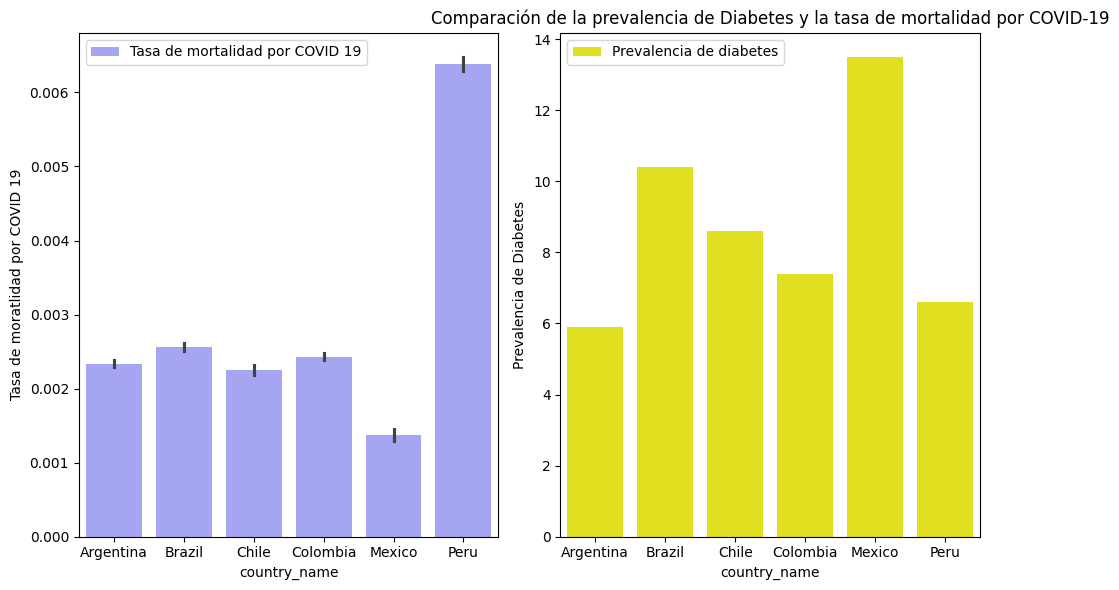

In [29]:
fig, (ax1, ax2)= plt.subplots(1, 2, figsize=(10,6))
sns.barplot(data=data_latinoamerica_paises, x= 'country_name', y= 'diabetes_prevalence', color='yellow', label='Prevalencia de diabetes', ax=ax2)
sns.barplot(data=data_latinoamerica_paises, x= 'country_name', y= data_latinoamerica_paises['cumulative_deceased']/data_latinoamerica_paises['population'], color='blue', label= 'Tasa de mortalidad por COVID 19', alpha=0.4, ax=ax1)
ax2.set_ylabel('Prevalencia de Diabetes')
ax1.set_ylabel('Tasa de moratlidad por COVID 19')
plt.title('Comparación de la prevalencia de Diabetes y la tasa de mortalidad por COVID-19')
plt.tight_layout()
plt.show()

### Avance 3

    * Análisis exploratorio -  Vamos a realizar un análisis del comportamiento de manera semanal y anual.

  * Evolución semanal de casos nuevos

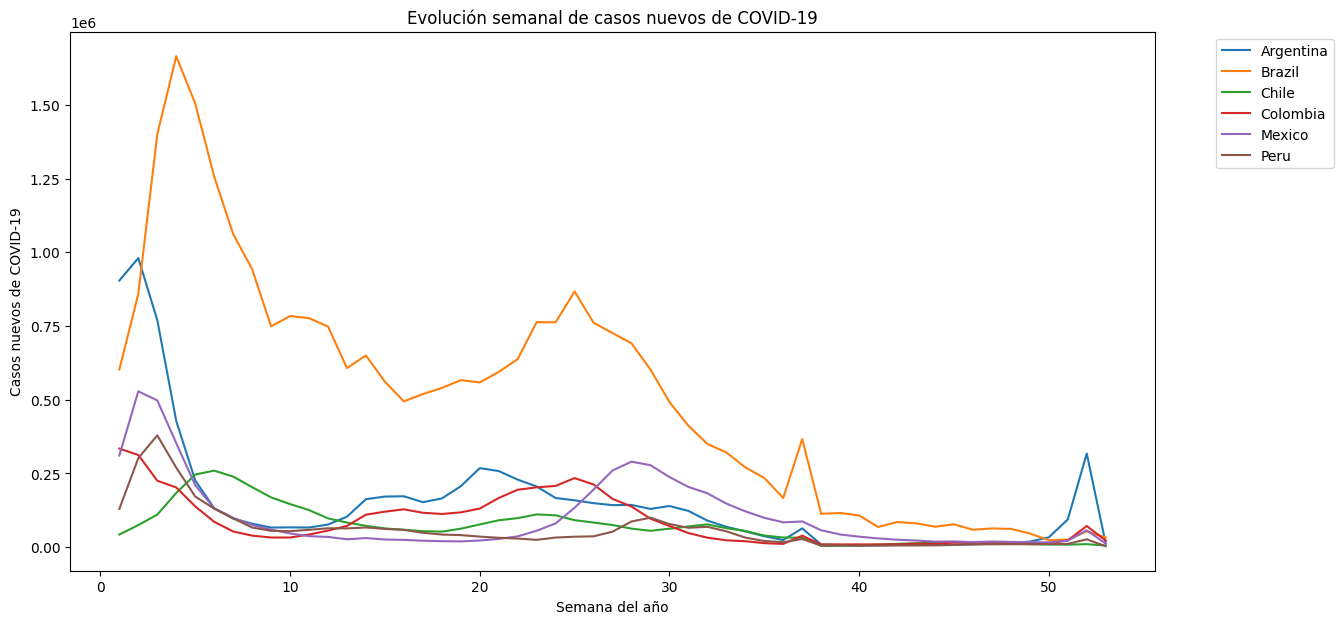

In [68]:
#Evolución de los casos de COVID-19 en América Latina a lo largo del tiempo por semana

data_latinoamerica_paises['week'] = data_latinoamerica_paises.index.isocalendar().week
data_latinoamerica_paises['year'] = data_latinoamerica_paises.index.isocalendar().year
weekly_cases = data_latinoamerica_paises.groupby(['country_name', 'week'])['new_confirmed'].sum().reset_index()
plt.figure(figsize=(14,7))
for country in weekly_cases['country_name'].unique():
    country_weekly_cases = weekly_cases[weekly_cases['country_name'] == country]
    plt.plot(country_weekly_cases['week'], country_weekly_cases['new_confirmed'], label=country)

plt.xlabel('Semana del año')
plt.ylabel('Casos nuevos de COVID-19')
plt.title('Evolución semanal de casos nuevos de COVID-19')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

* Evolución mensual de casos nuevos

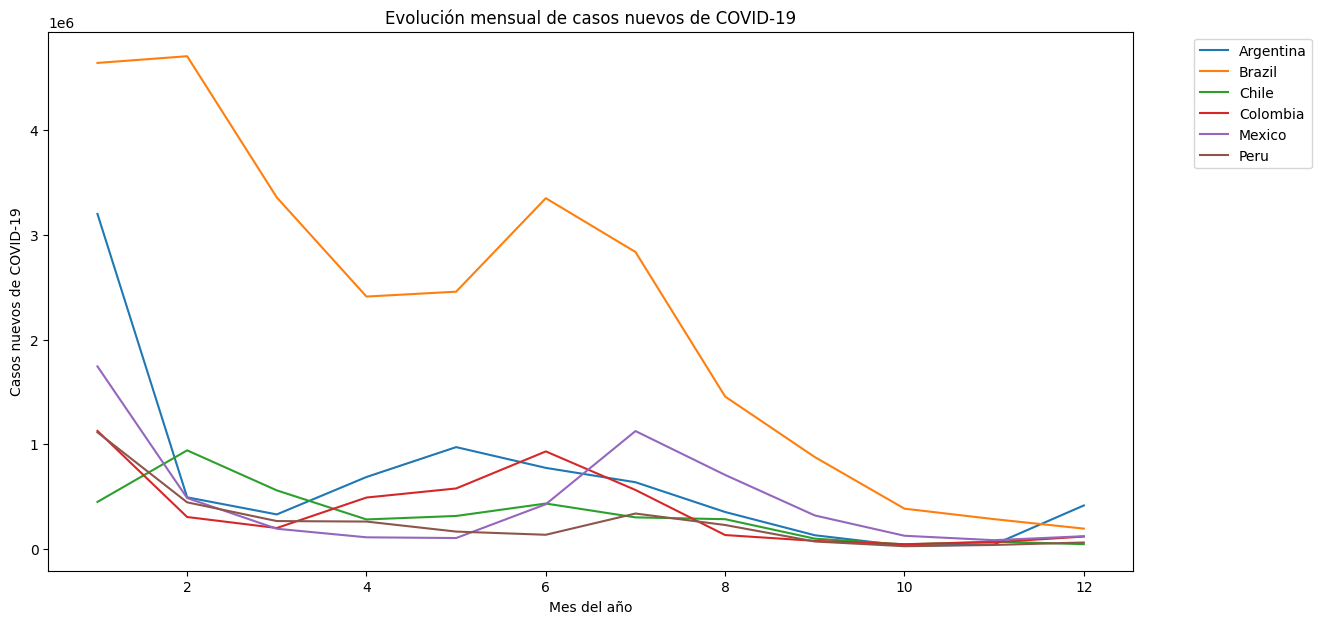

In [70]:
#Evolución de los casos de COVID-19 en América Latina a lo largo del tiempo por mes del año
data_latinoamerica_paises['month'] = data_latinoamerica_paises.index.month
monthly_cases=data_latinoamerica_paises.groupby(['country_name','month'])['new_confirmed'].sum().reset_index()
plt.figure(figsize=(14,7))
for country in monthly_cases['country_name'].unique():
    country_monthly_cases = monthly_cases[monthly_cases['country_name'] == country]
    plt.plot(country_monthly_cases['month'], country_monthly_cases['new_confirmed'], label=country)

plt.xlabel('Mes del año')
plt.ylabel('Casos nuevos de COVID-19')
plt.title('Evolución mensual de casos nuevos de COVID-19')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.show()

* Progreso de vacunación por país

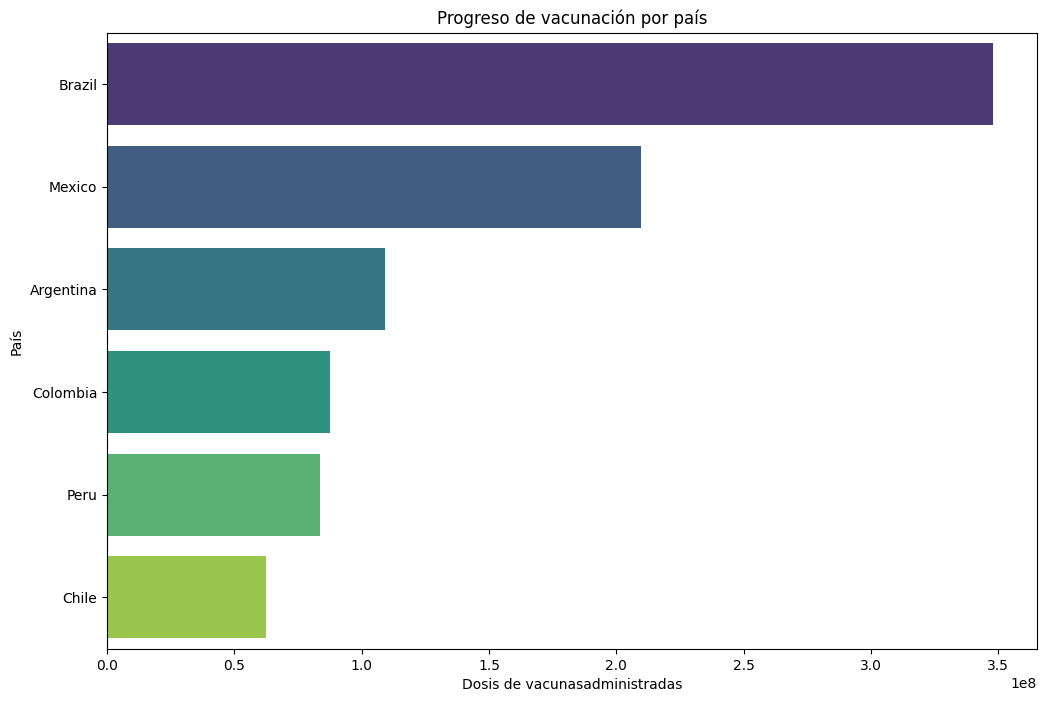

In [72]:
# Progreso de vacunación por país
data_vacunacion = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max().sort_values(ascending=False)
plt.figure(figsize=(12,8))
sns.barplot(x=data_vacunacion.values, y=data_vacunacion.index, hue=data_vacunacion.index, palette='viridis')
plt.title('Progreso de vacunación por país')
plt.xlabel('Dosis de vacunasadministradas')
plt.ylabel('País')
plt.show()

* Relación entre la temperatura promedio y los nuevos casos confirmados

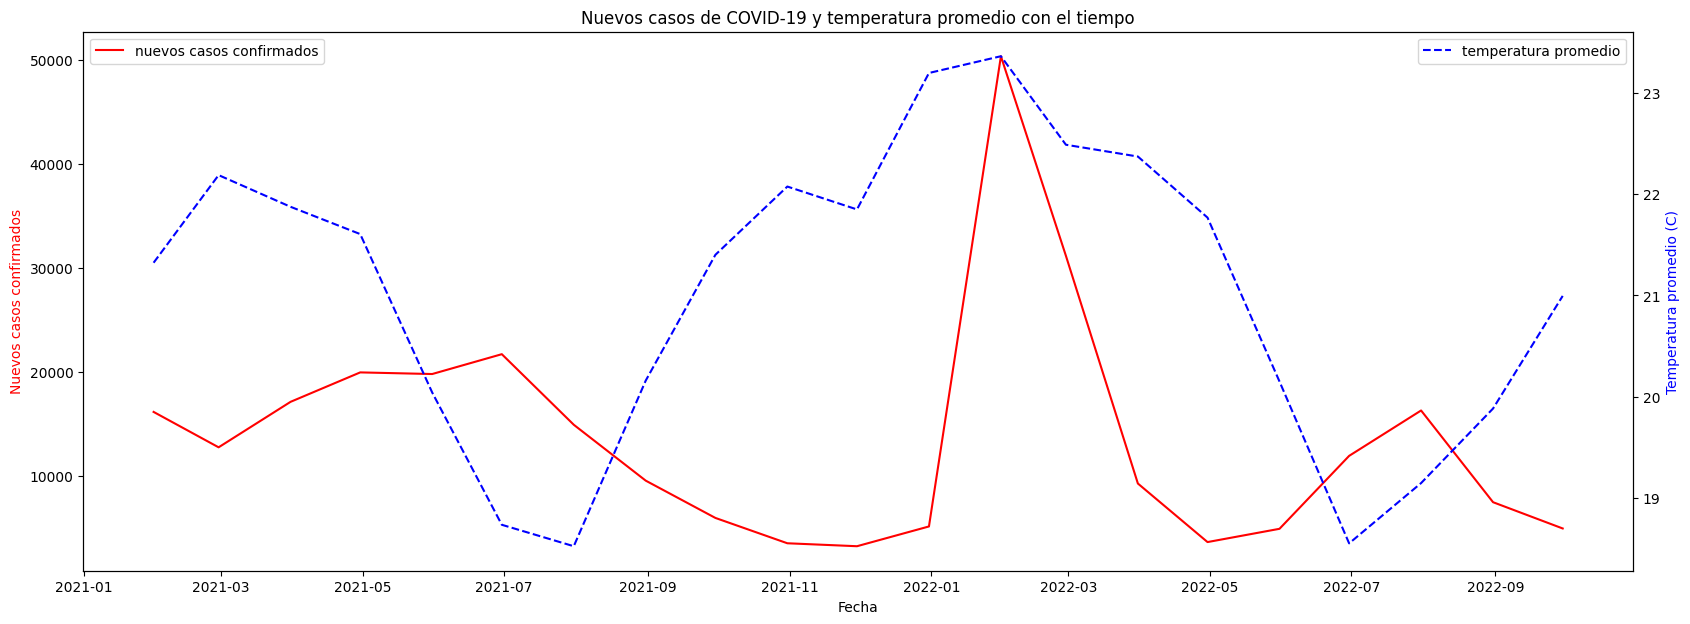

In [74]:
plt.figure(figsize=(20,7))
ax1 = plt.gca()
ax2 = ax1.twinx()
ax1.plot(data_latinoamerica_paises.resample('ME').mean(numeric_only=True).index, data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['new_confirmed'], color='red', label='nuevos casos confirmados', )
ax2.plot(data_latinoamerica_paises.resample('ME').mean(numeric_only=True).index, data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['average_temperature_celsius'], color='blue', label='temperatura promedio', linestyle='--')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Nuevos casos confirmados', color='red')
ax2.set_ylabel('Temperatura promedio (C)', color='blue')
plt.title('Nuevos casos de COVID-19 y temperatura promedio con el tiempo')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()

* Impacto de la urbanización en la propagación del COVID-19

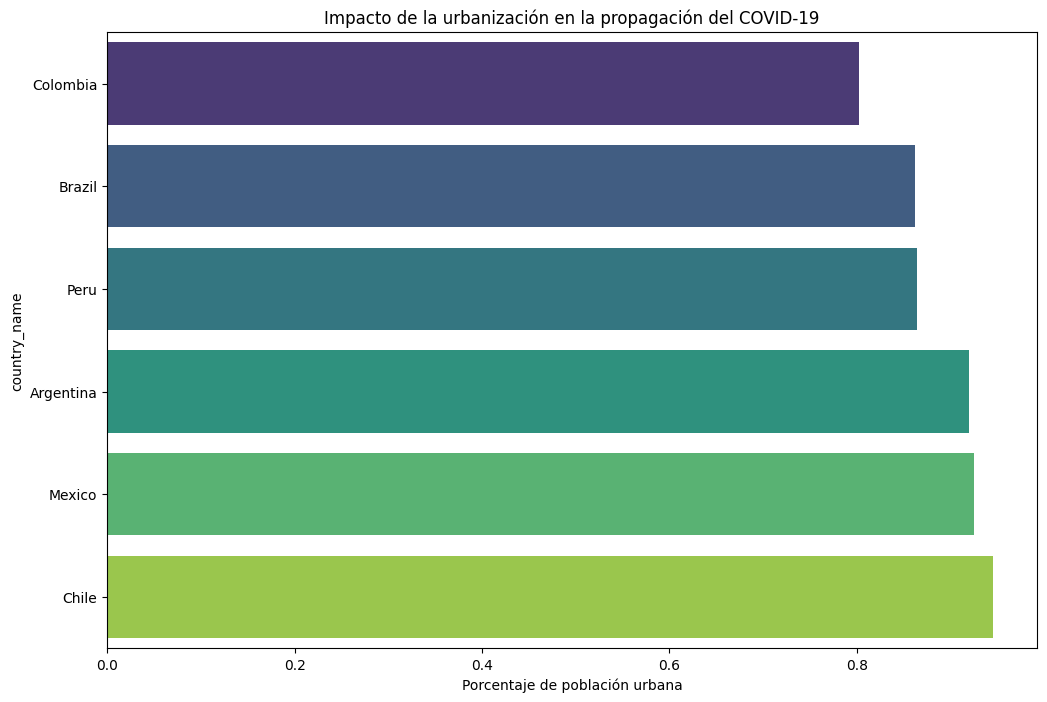

In [75]:
data_latinoamerica_paises['porcentaje_poblacion_urbana']=data_latinoamerica_paises['population_urban']/data_latinoamerica_paises['population']
casos_urbanos = data_latinoamerica_paises.groupby('country_name').last().sort_values(by='porcentaje_poblacion_urbana')

plt.figure(figsize=(12,8))
sns.barplot(x=casos_urbanos['porcentaje_poblacion_urbana'], y=casos_urbanos.index, hue=casos_urbanos.index, palette='viridis', legend=False)
plt.xlabel('Porcentaje de población urbana')
plt.title('Impacto de la urbanización en la propagación del COVID-19')
plt.show()

* Distribución de población por edad en países con altas tasas de mortalidad por COVID-19

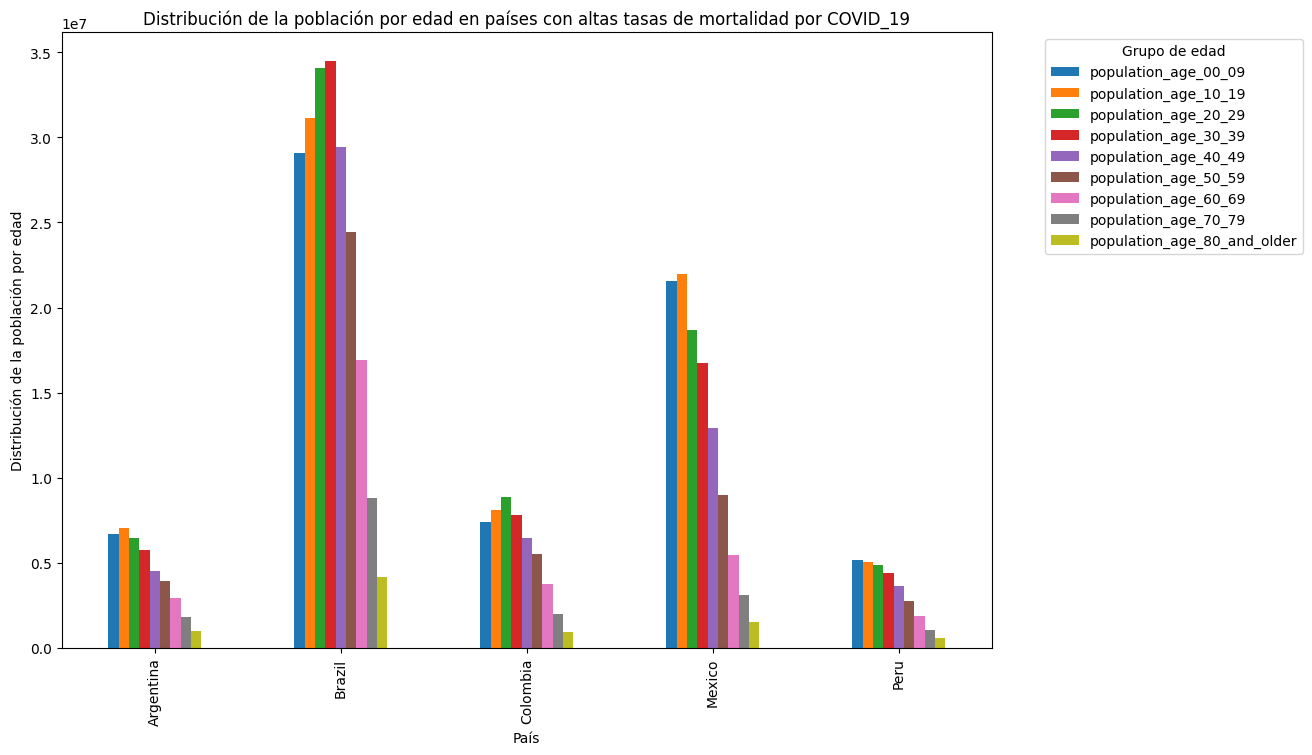

In [76]:
paises_alta_mortalidad = data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().sort_values(ascending=False).head(5).index
grupo_por_edad = ['population_age_00_09', 'population_age_10_19', 'population_age_20_29', 'population_age_30_39', 'population_age_40_49', 'population_age_50_59',
                   'population_age_60_69', 'population_age_70_79', 'population_age_80_and_older']
distribucion_por_edad = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin(paises_alta_mortalidad)].groupby('country_name')[grupo_por_edad].mean()

distribucion_por_edad.plot(kind='bar', stacked=False, figsize=(12,8) )
plt.xlabel('País')
plt.ylabel('Distribución de la población por edad')
plt.title('Distribución de la población por edad en países con altas tasas de mortalidad por COVID_19')
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left', title='Grupo de edad')
plt.show()


* Comparación de estrategias de vacunación en América Latina

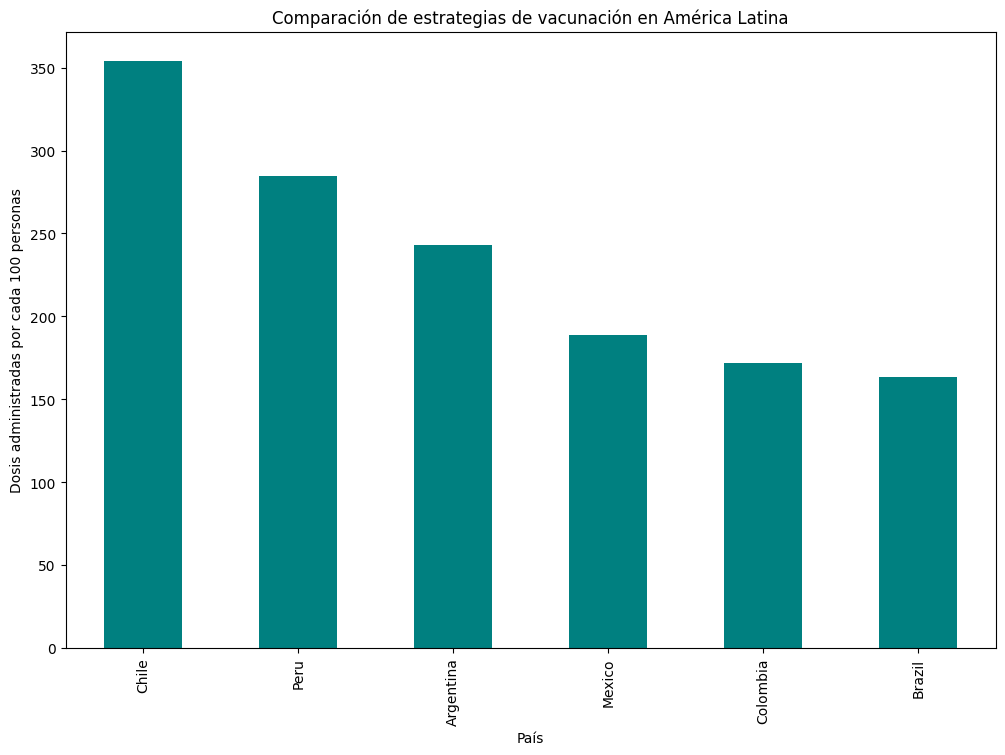

In [77]:
estrategia_vacunacion = data_latinoamerica_paises.groupby('country_name')['cumulative_vaccine_doses_administered'].max() / data_latinoamerica_paises.groupby('country_name')['population'].max() * 100
estrategia_vacunacion.sort_values(ascending=False).plot(kind='bar', figsize=(12,8), color='teal')
plt.xlabel('País')
plt.ylabel('Dosis administradas por cada 100 personas')
plt.title('Comparación de estrategias de vacunación en América Latina')
plt.show()

* Prevalencia de condiciones preexistentes en países con altas y bajas tasas de mortalidad por COVID_19

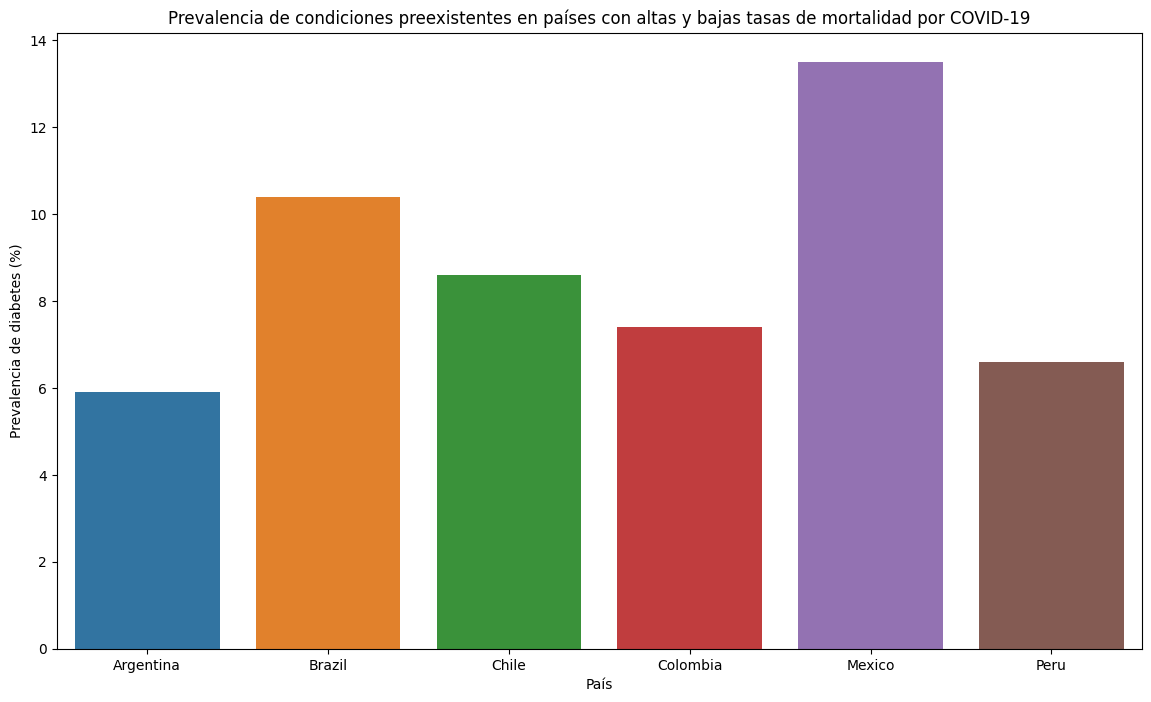

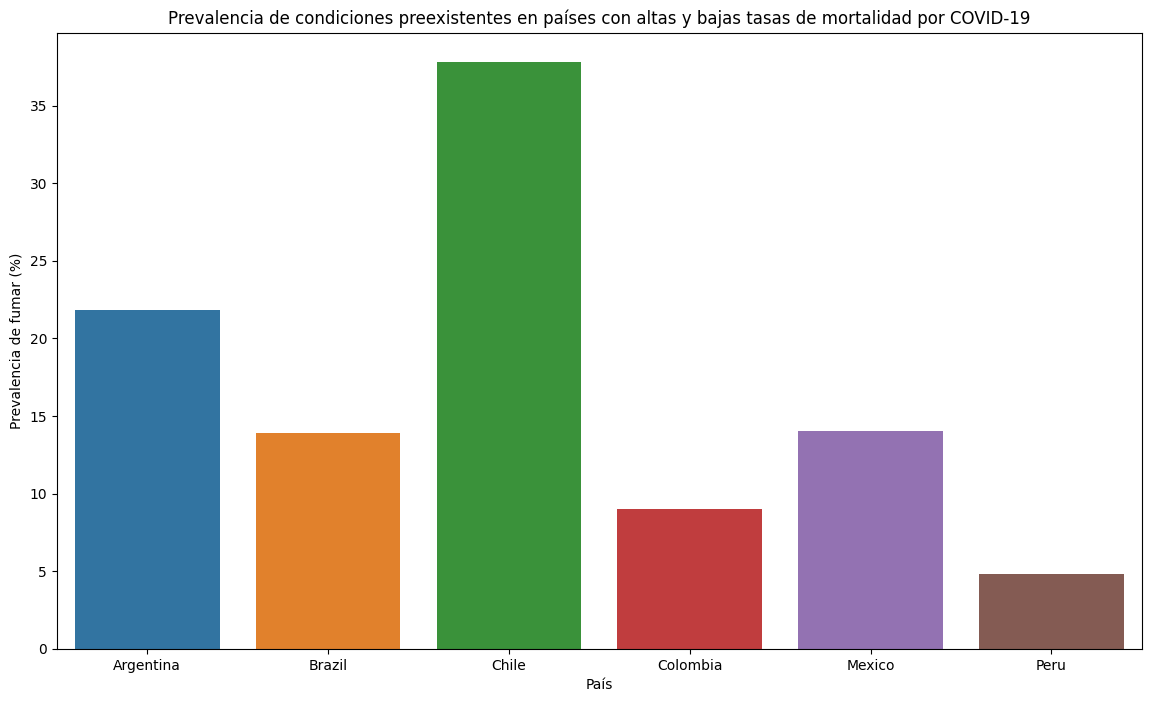

In [79]:
top_paises = data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().nlargest(5).index
bottom_paises = data_latinoamerica_paises.groupby('country_name')['cumulative_deceased'].max().nsmallest(5).index
data_condicion = data_latinoamerica_paises[data_latinoamerica_paises['country_name'].isin (top_paises.union(bottom_paises))]

plt.figure(figsize=(14,8))
sns.barplot(data=data_condicion, x='country_name', y='diabetes_prevalence', hue='country_name')
plt.xlabel('País')
plt.ylabel('Prevalencia de diabetes (%)')
plt.title('Prevalencia de condiciones preexistentes en países con altas y bajas tasas de mortalidad por COVID-19')
plt.show()

plt.figure(figsize=(14,8))
sns.barplot(data=data_condicion, x='country_name', y='smoking_prevalence', hue='country_name')
plt.xlabel('País')
plt.ylabel('Prevalencia de fumar (%)')
plt.title('Prevalencia de condiciones preexistentes en países con altas y bajas tasas de mortalidad por COVID-19')
plt.show()

* Comparación de tasa de letalidad del COVID-19 entre países

Aún por verificar:

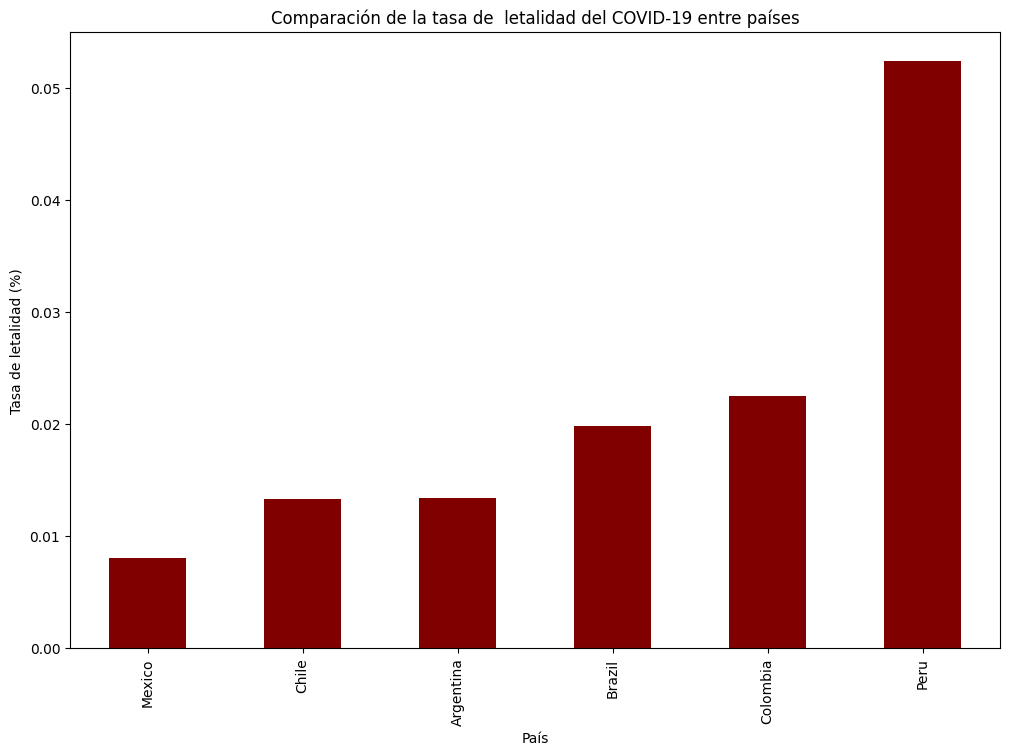

In [81]:
data_latinoamerica_paises['casos_tasa_letalidad'] = data_latinoamerica_paises['cumulative_deceased'] / data_latinoamerica_paises['cumulative_confirmed']
tasa_letalidad = data_latinoamerica_paises.groupby('country_name')['casos_tasa_letalidad'].last().sort_values()

plt.figure(figsize=(12,8))
tasa_letalidad.plot(kind='bar', color='maroon')
plt.xlabel('País')
plt.ylabel('Tasa de letalidad (%)')
plt.title('Comparación de la tasa de  letalidad del COVID-19 entre países')
plt.show()


* Como evoluciona la vacunacion en América latina y la reducción de casos de COVID_19

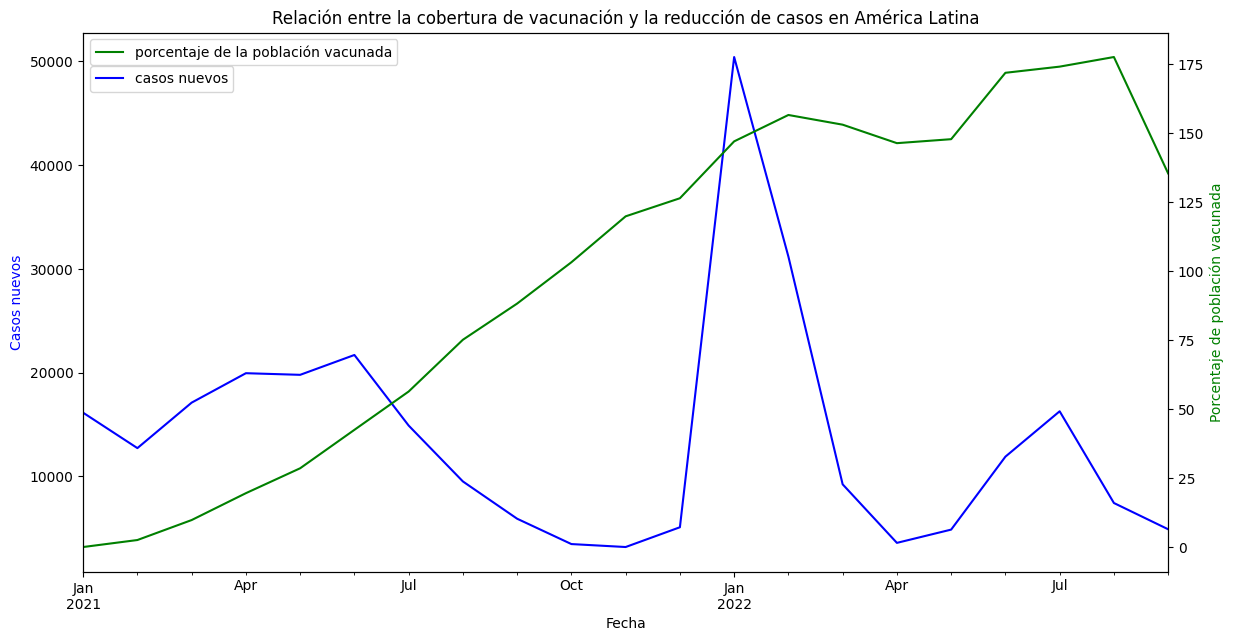

In [82]:
plt.figure(figsize=(14,7))
ax1 = plt.gca()
ax2 = ax1.twinx()

data_latinoamerica_paises['porcentaje_vacunados'] = (data_latinoamerica_paises['cumulative_vaccine_doses_administered'] / data_latinoamerica_paises['population'])*100
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['new_confirmed'].plot(ax=ax1, color='blue', label= 'casos nuevos')
data_latinoamerica_paises.resample('ME').mean(numeric_only=True)['porcentaje_vacunados'].plot(ax=ax2, color='green', label= 'porcentaje de la población vacunada')

ax1.set_xlabel('Fecha')
ax1.set_ylabel('Casos nuevos', color='blue')
ax2.set_ylabel('Porcentaje de población vacunada', color='green')
ax1.set_title('Relación entre la cobertura de vacunación y la reducción de casos en América Latina')
ax1.legend(loc='upper left', bbox_to_anchor=(0, 0.95))
ax2.legend(loc='upper left')
plt.show()
# ?


+ Evolución de casos activos vs recuperados en América latina

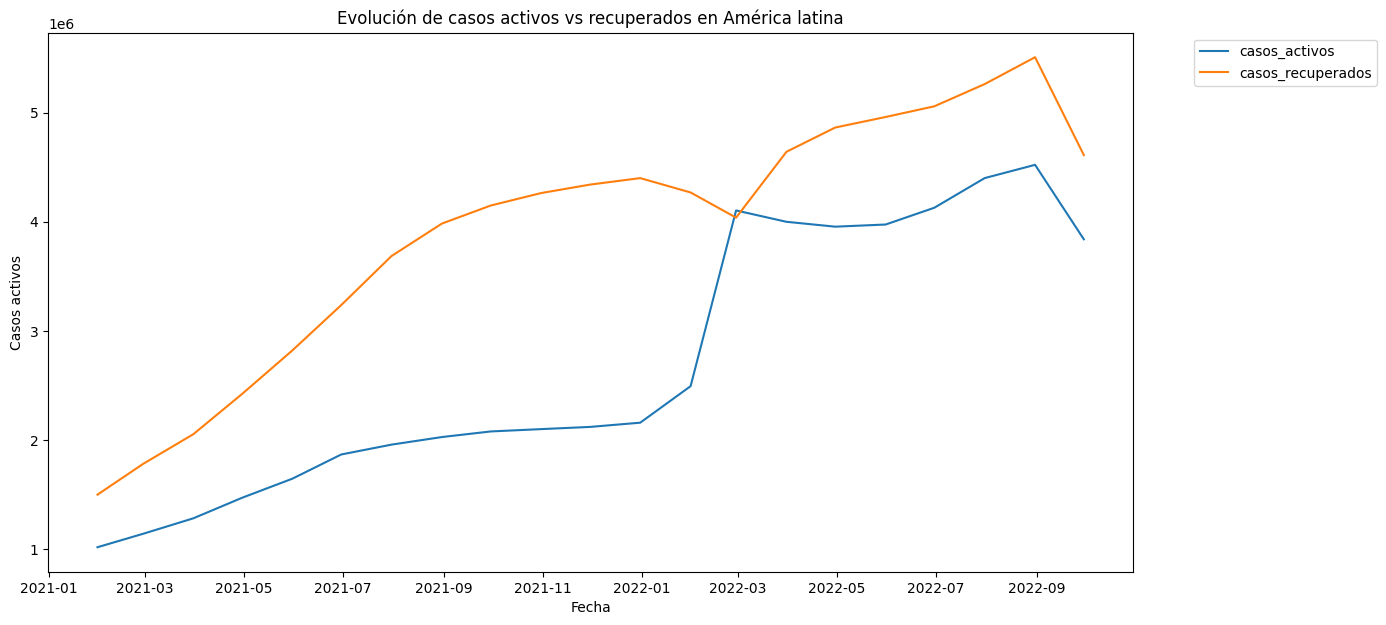

In [ ]:
data_latinoamerica_paises['casos_activos'] = data_latinoamerica_paises['cumulative_confirmed']-data_latinoamerica_paises['cumulative_deceased']-data_latinoamerica_paises['cumulative_recovered']
plt.figure(figsize=(14,7))
sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='casos_activos', label='casos_activos')
sns.lineplot(data=data_latinoamerica_paises.resample('ME').mean(numeric_only=True), x='date', y='cumulative_recovered', label='casos_recuperados')
plt.xlabel('Fecha')
plt.ylabel('Casos activos')
plt.title('Evolución de casos activos vs recuperados en América latina')
plt.legend(bbox_to_anchor=(1.05,1))
plt.show()

+ Comparación de la situación actual de COVID-19 entre países

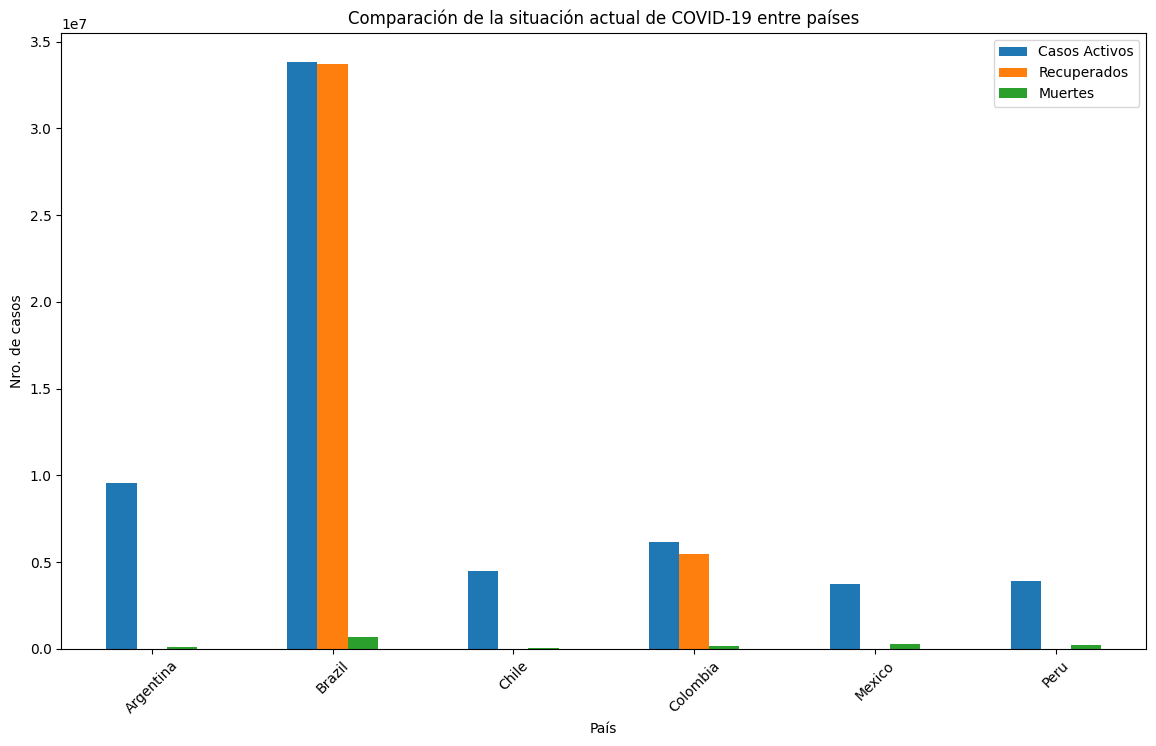

In [ ]:
situacion_actual = data_latinoamerica_paises.groupby('country_name').max()[['casos_activos','cumulative_recovered','cumulative_deceased']]
situacion_actual.plot(kind='bar', stacked=False, figsize=(14,8))
plt.title('Comparación de la situación actual de COVID-19 entre países')
plt.xlabel('País')
plt.ylabel('Nro. de casos')
plt.legend(['Casos Activos','Recuperados', 'Muertes'])
plt.xticks(rotation=45)
plt.show()

In [ ]:
data_latinoamerica_paises.groupby('country_name').max()[['casos_activos','cumulative_recovered','cumulative_deceased']]

casos_activos  cumulative_recovered  cumulative_deceased
country_name                                                          
Argentina         9567933.0                   0.0             129830.0
Brazil           33819307.0            33706231.0             685203.0
Chile             4507673.0                   0.0              60822.0
Colombia          6162609.0             5441021.0             155770.0
Mexico            3754874.0                   0.0             304025.0
Peru              3911439.0                   0.0             216173.0